In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore') # Turn off warnings
plt.style.use('seaborn-white') # Use seaborn-style plots
#for interactive plots
import ipywidgets
from ipywidgets import interact
from ipywidgets import interact_manual
%matplotlib inline

In [2]:
#importing the dataset
books = pd.read_csv('Books.csv')
ratings = pd.read_csv('Ratings.csv')
users = pd.read_csv('Users.csv')

In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [5]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
books.shape

(271360, 8)

In [7]:
ratings.shape

(1149780, 3)

In [8]:
users.shape

(278858, 3)

In [9]:
#analysing the users dataset
users.columns = users.columns.str.strip().str.lower().str.replace('-', '_')
users.head()

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [10]:
users.dtypes

user_id       int64
location     object
age         float64
dtype: object

In [11]:
uniq_users = users.user_id.nunique()
all_users = users.user_id.count()
print(f'No. of unique user_id entries: {uniq_users} | Total user_id entries: {all_users}')

No. of unique user_id entries: 278858 | Total user_id entries: 278858


## #The 'User-ID' field is integers, 'Location' are strings', and the 'Age' values are floats.

### #We can probably change the ages to ints. Let's take a look at the values first.

In [12]:
print(sorted(users.age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

The Age range goes from 0 to 244 years old! obviously this can't be correct so we will set all the ages less than 5 and greater than 100 to NaN


In [13]:
users.loc[(users.age<5) | (users.age>100), 'age'] = np.nan

In [14]:
users.head()

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [15]:
print(sorted(users.age.unique()))

[nan, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0]


As the ages now go from 5 to 100 ,with missing values as NaN let us plot this to see how they are distributed

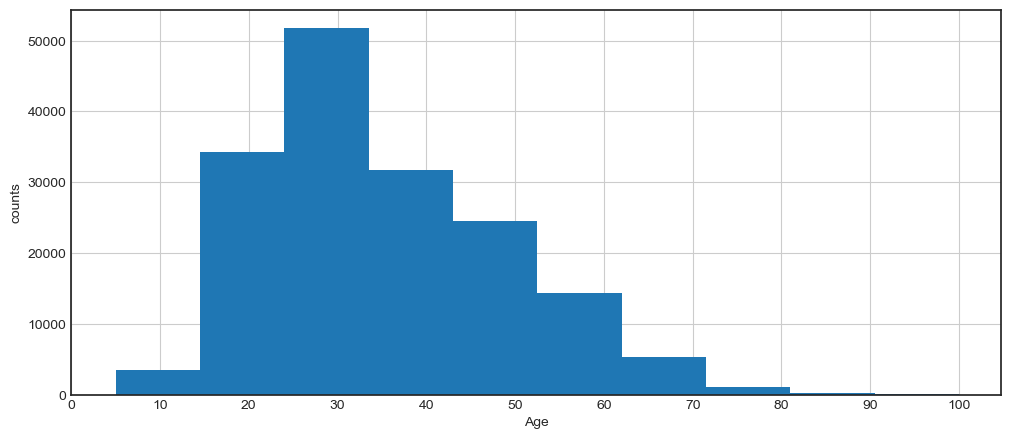

In [16]:
#Creating the Histogram for the Age Field
hist = users.age.hist(bins=10, figsize=(12,5))
hist.set_xlabel('Age')
hist.set_ylabel('counts')
hist.set_xticks(range(0,110,10))
plt.show()

 It seems that most of our reviewers are in their late 20s to early 30s.

How many missing Age's do we now have in the dataset?

In [17]:
age_null = users.age.isnull().sum() # Sums up the 1's returned by the isnull() mask
all_users = users.user_id.count() # Counts the number of cells in the series - excludes NaNs!
print(f'There are {age_null} empty age values in our set of {all_users} users (or {(age_null/all_users)*100:.2f}%).')

There are 112010 empty age values in our set of 278858 users (or 40.17%).


Next, can we expand the 'Location' field to break it up into 'City', 'State', and 'Country'.

In [18]:
# Note: Used Pandas Series.str.split method as it has an 'expand' parameter which can handle None cases
user_location_expanded = users.location.str.split(',', n=2, expand=True)
user_location_expanded.columns = ['city', 'state', 'country']
users = users.join(user_location_expanded)

In [19]:
users

,user_id,location,age,city,state,country
0,1,"nyc, new york, usa",NaN,nyc,new york,usa
1,2,"stockton, california, usa",18.0,stockton,california,usa
2,3,"moscow, yukon territory, russia",NaN,moscow,yukon territory,russia
3,4,"porto, v.n.gaia, portugal",17.0,porto,v.n.gaia,portugal
4,5,"farnborough, hants, united kingdom",NaN,farnborough,hants,united kingdom
...,...,...,...,...,...,...
278853,278854,"portland, oregon, usa",NaN,portland,oregon,usa
278854,278855,"tacoma, washington, united kingdom",50.0,tacoma,washington,united kingdom
278855,278856,"brampton, ontario, canada",NaN,brampton,ontario,canada
278856,278857,"knoxville, tennessee, usa",NaN,knoxville,tennessee,usa


In [20]:
#Let's take a quick look at these Location-derived fields.

top_cities = users.city.value_counts().head(10)
print(f'The 10 cities with the most users are:\n{top_cities}')

The 10 cities with the most users are:
city
london       4105
barcelona    2664
toronto      2342
madrid       1933
sydney       1884
portland     1869
melbourne    1863
vancouver    1699
chicago      1566
seattle      1541
Name: count, dtype: int64


In [21]:
top_countries = users.country.value_counts().head(10)
print(f'The 10 countries with the most users are:\n{top_countries}')

The 10 countries with the most users are:
country
 usa               139183
 canada             21556
 united kingdom     18286
 germany            17021
 spain              13088
 australia          11719
 italy              11238
                     4561
 france              3440
 portugal            3305
Name: count, dtype: int64


It looks like an empty 'Country' field is in the top 10 most common entries

In [22]:
empty_string_country = users[users.country == ''].country.count()
nan_country = users.country.isnull().sum()
print(f'There are {empty_string_country} entries with empty strings, and {nan_country} NaN entries in the Country field')

There are 4561 entries with empty strings, and 2 NaN entries in the Country field


In [23]:
#We should probably change these empty strings to NaNs.

users.country.replace('', np.nan, inplace=True)

# Check for invalid entries in the 'location' column
invalid_entries = users['country'].isin(['', 'Unknown', 'N/A', 'NaN', 'None'])



In [24]:
invalid_entries.sum()

0

In [25]:
# Calculate the percentage of invalid entries
percentage_invalid_entries = invalid_entries.sum() / users['country'].count() * 100

print(f'Percentage of invalid entries in the "country" column: {percentage_invalid_entries}')

Percentage of invalid entries in the "country" column: 0.0


Might want to filter out invalid Location-based entries by looking at the city/state/country entries that only occur a few times (maybe <3), however we will leave this as is at the moment. I'll re-visit this idea more thoroughly if we end up using Location in the modeling

In [26]:
users.head(10)

,user_id,location,age,city,state,country
0,1,"nyc, new york, usa",NaN,nyc,new york,usa
1,2,"stockton, california, usa",18.0,stockton,california,usa
2,3,"moscow, yukon territory, russia",NaN,moscow,yukon territory,russia
3,4,"porto, v.n.gaia, portugal",17.0,porto,v.n.gaia,portugal
4,5,"farnborough, hants, united kingdom",NaN,farnborough,hants,united kingdom
5,6,"santa monica, california, usa",61.0,santa monica,california,usa
6,7,"washington, dc, usa",NaN,washington,dc,usa
7,8,"timmins, ontario, canada",NaN,timmins,ontario,canada
8,9,"germantown, tennessee, usa",NaN,germantown,tennessee,usa
9,10,"albacete, wisconsin, spain",26.0,albacete,wisconsin,spain


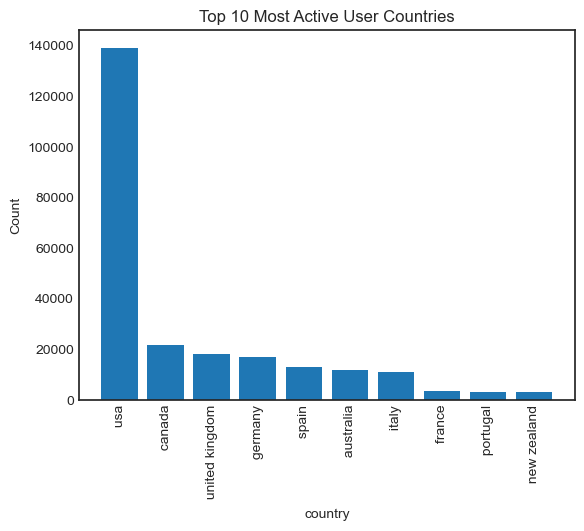

In [27]:
#Bar Plot of Top 10 Most Active User countries
top_user_countries = users['country'].value_counts().head(10)
plt.bar(top_user_countries.index,top_user_countries.values)
plt.xticks(rotation = 90)
plt.xlabel('country')
plt.ylabel('Count')
plt.title('Top 10 Most Active User Countries')
plt.show()

Verifying and Analysing the Books DataFrame

In [28]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [29]:
#note that ISBN column may contain some letters so we can not convert them into numeric values
#we probably want year-of-pulication to be in ints/floats and rest to be in objects datatype

In [30]:
books.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

In [31]:
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'], errors='coerce')


In [32]:
# Check for 0's or NaNs in Year of Publication
zero_yr = books[books['Year-Of-Publication'] == 0]['Year-Of-Publication'].count()
nan_yr = books['Year-Of-Publication'].isnull().sum()
print(f'There are {zero_yr} entries as \'0\', and {nan_yr} NaN entries in the Year of Publication field')


There are 4618 entries as '0', and 3 NaN entries in the Year of Publication field


In [33]:
# Replace all years of zero with NaN
books['Year-Of-Publication'].replace(0, np.nan, inplace=True)


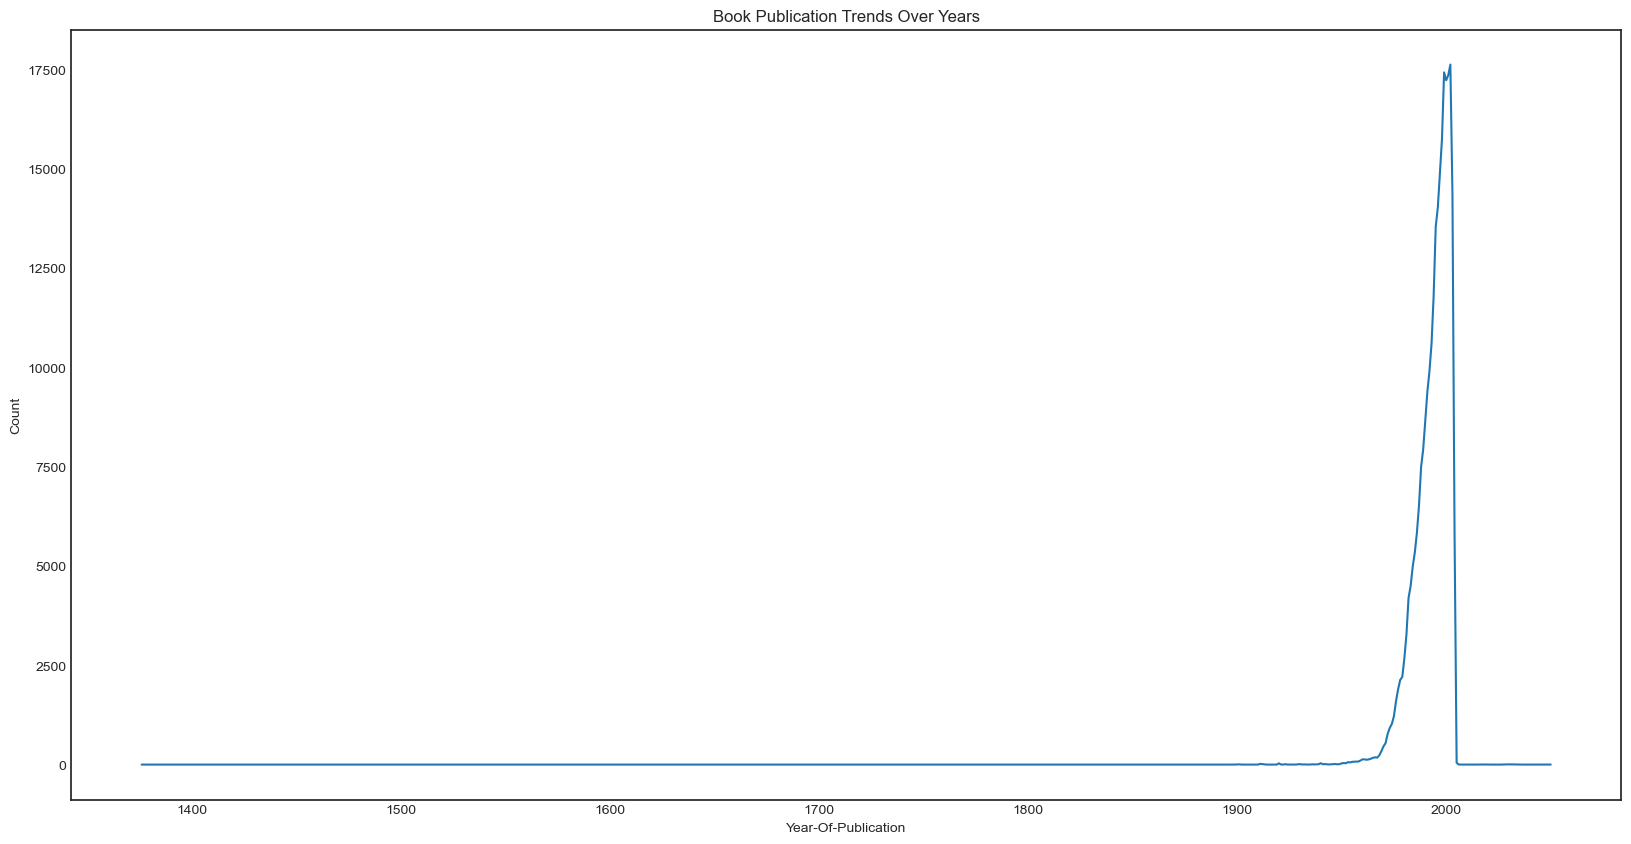

In [34]:
#line plot of Book Publication Trends Over Years
books.groupby('Year-Of-Publication')['Book-Title'].agg('count').plot(figsize = (20,10))
plt.xlabel('Year-Of-Publication')
plt.ylabel('Count')
plt.title('Book Publication Trends Over Years')
plt.show()

In [35]:
#We clean up the ampersand formatting in the Publisher field.

books.Publisher = books.Publisher.str.replace('&amp', '&', regex=False)
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [36]:
#Check that there are no duplicated book entries.
uniq_books = books.ISBN.nunique()
all_books = books.ISBN.count()
print(f'No. of unique books: {uniq_books} | All book entries: {all_books}')

No. of unique books: 271360 | All book entries: 271360


In [37]:
#Let's look at the most frequent Publishing houses in the dataset.

top_publishers = books.Publisher.value_counts()[:10]
print(f'The 10 publishers with the most entries in the books table are:\n{top_publishers}')

The 10 publishers with the most entries in the books table are:
Publisher
Harlequin                   7535
Silhouette                  4220
Pocket                      3905
Ballantine Books            3783
Bantam Books                3646
Scholastic                  3160
Simon &; Schuster           2971
Penguin Books               2844
Berkley Publishing Group    2771
Warner Books                2727
Name: count, dtype: int64


In [38]:
top_authors = books['Book-Author'].value_counts()[:10]
print(f'The 10 authors with the most entries in the books table are:\n{top_authors}')

The 10 authors with the most entries in the books table are:
Book-Author
Agatha Christie        632
William Shakespeare    567
Stephen King           524
Ann M. Martin          423
Carolyn Keene          373
Francine Pascal        372
Isaac Asimov           330
Nora Roberts           315
Barbara Cartland       307
Charles Dickens        302
Name: count, dtype: int64


In [39]:
#We should search for empty or NaN values in these fields too.
empty_string_publisher = books[books.Publisher == ''].Publisher.count()
nan_publisher = books.Publisher.isnull().sum()
print(f'There are {empty_string_publisher} entries with empty strings, and {nan_publisher} NaN entries in the Publisher field')


There are 0 entries with empty strings, and 2 NaN entries in the Publisher field


There are 0 entries with empty strings, and 2 NaN entries in the Publisher field
 no empty strings in the Publisher field, and only 2 NaNs.

In [40]:
empty_string_author = books[books['Book-Author'] == '']['Book-Author'].count()
nan_author = books['Book-Author'].isnull().sum()
print(f'There are {empty_string_author} entries with empty strings, and {nan_author} NaN entries in the Author field')


There are 0 entries with empty strings, and 2 NaN entries in the Author field


In [41]:
# Filter the data to exclude empty strings and NaN entries in the 'Book-Author' field
filtered_authors = books[(books['Book-Author'] != '') & (~books['Book-Author'].isnull())]

# Find the top 10 authors
top_10_authors = filtered_authors['Book-Author'].value_counts().head(10)
print(top_10_authors)

Book-Author
Agatha Christie        632
William Shakespeare    567
Stephen King           524
Ann M. Martin          423
Carolyn Keene          373
Francine Pascal        372
Isaac Asimov           330
Nora Roberts           315
Barbara Cartland       307
Charles Dickens        302
Name: count, dtype: int64


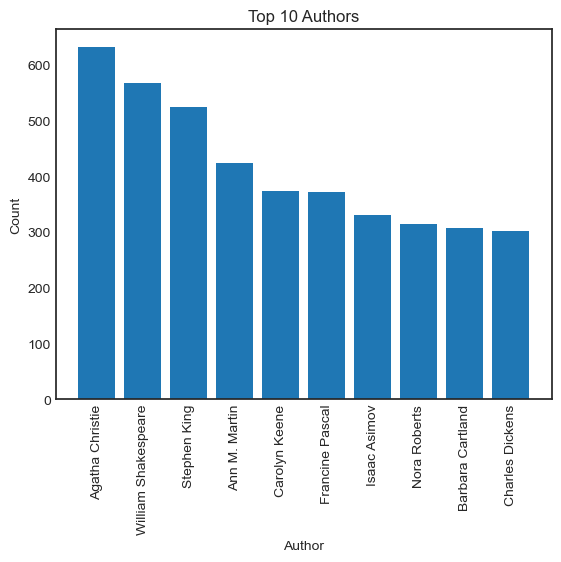

In [42]:
top_10_authors = books['Book-Author'].value_counts().head(10)
plt.bar(top_10_authors.index, top_10_authors.values)
plt.xticks(rotation=90)
plt.xlabel('Author')
plt.ylabel('Count')
plt.title('Top 10 Authors')
plt.show()

In [43]:
#Let's look at the titles.

top_titles = books['Book-Title'].value_counts().head(10)
print(f'The 10 book titles with the most entries in the books table are:\n{top_titles}')

The 10 book titles with the most entries in the books table are:
Book-Title
Selected Poems                    27
Little Women                      24
Wuthering Heights                 21
The Secret Garden                 20
Dracula                           20
Adventures of Huckleberry Finn    20
Jane Eyre                         19
The Night Before Christmas        18
Pride and Prejudice               18
Great Expectations                17
Name: count, dtype: int64


This is actually quite an important observation. Although all of the ISBN entries are unique in the 'books' dataframe, different forms of the same book will have different ISBNs - i.e. paperback, e-book, etc. Therefore, we can tell and see that some books have multiple ISBN entries.


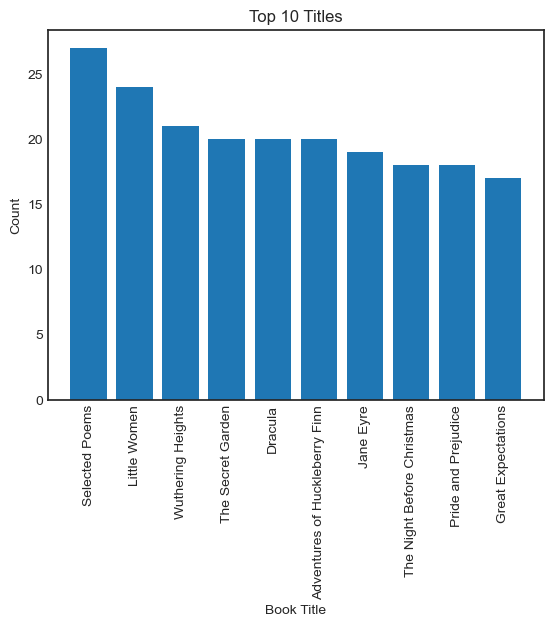

In [44]:
top_10_titles = books['Book-Title'].value_counts().head(10)
plt.bar(top_10_titles.index, top_10_titles.values)
plt.xticks(rotation=90)
plt.xlabel('Book Title')
plt.ylabel('Count')
plt.title('Top 10 Titles')
plt.show()

In [45]:
books[books['Book-Title']=='Pride and Prejudice']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
41,055321215X,Pride and Prejudice,Jane Austen,1983.0,Bantam,http://images.amazon.com/images/P/055321215X.0...,http://images.amazon.com/images/P/055321215X.0...,http://images.amazon.com/images/P/055321215X.0...
6744,0553213105,Pride and Prejudice,Jane Austen,1981.0,Bantam,http://images.amazon.com/images/P/0553213105.0...,http://images.amazon.com/images/P/0553213105.0...,http://images.amazon.com/images/P/0553213105.0...
13196,0451523652,Pride and Prejudice,Jane Austen,1988.0,New Amer Library Classics,http://images.amazon.com/images/P/0451523652.0...,http://images.amazon.com/images/P/0451523652.0...,http://images.amazon.com/images/P/0451523652.0...
16830,1566190932,Pride and Prejudice,Jane Austen,1993.0,Barnes Noble Classics,http://images.amazon.com/images/P/1566190932.0...,http://images.amazon.com/images/P/1566190932.0...,http://images.amazon.com/images/P/1566190932.0...
18484,0451525884,Pride and Prejudice,Jane Austen,1996.0,Signet Book,http://images.amazon.com/images/P/0451525884.0...,http://images.amazon.com/images/P/0451525884.0...,http://images.amazon.com/images/P/0451525884.0...
20541,0451519167,Pride and Prejudice,Jane Austen,1961.0,Signet Book,http://images.amazon.com/images/P/0451519167.0...,http://images.amazon.com/images/P/0451519167.0...,http://images.amazon.com/images/P/0451519167.0...
24229,0893756113,Pride and Prejudice,Jane Austen,1997.0,Troll Communications,http://images.amazon.com/images/P/0893756113.0...,http://images.amazon.com/images/P/0893756113.0...,http://images.amazon.com/images/P/0893756113.0...
43980,0553210181,Pride and Prejudice,Jane Austen,1981.0,Bantam Books,http://images.amazon.com/images/P/0553210181.0...,http://images.amazon.com/images/P/0553210181.0...,http://images.amazon.com/images/P/0553210181.0...
46627,0192815032,Pride and Prejudice,Jane Austen,1987.0,Oxford University Press,http://images.amazon.com/images/P/0192815032.0...,http://images.amazon.com/images/P/0192815032.0...,http://images.amazon.com/images/P/0192815032.0...
51202,0140238212,Pride and Prejudice,Jane Austen,1995.0,Penguin Books Ltd,http://images.amazon.com/images/P/0140238212.0...,http://images.amazon.com/images/P/0140238212.0...,http://images.amazon.com/images/P/0140238212.0...


It looks like each ISBN assigned to the book 'Pride and Prejudice' has different Publisher and Year of Publication values also.

It might be more useful for our model if we simplified this to give each book a unique identifier, independent of the book format, as our recommendations will be for a book, not a specific version of a book.

In [46]:
#Verifying and Analysing Ratings Table

ratings.columns = ratings.columns.str.strip().str.lower().str.replace("-","_")
ratings.head()

,user_id,isbn,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [47]:
ratings.dtypes

user_id         int64
isbn           object
book_rating     int64
dtype: object

In [48]:
# Which users contribute the most ratings?

Top_users = ratings.groupby('user_id').isbn.count().sort_values(ascending=False)
print(f'The 20 users with the most ratings:\n{Top_users[:20]}')

The 20 users with the most ratings:
user_id
11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
212898     4785
278418     4533
76352      3367
110973     3100
235105     3067
230522     2991
16795      2948
234623     2674
36836      2529
52584      2512
245963     2507
204864     2504
55492      2459
185233     2448
171118     2421
Name: isbn, dtype: int64


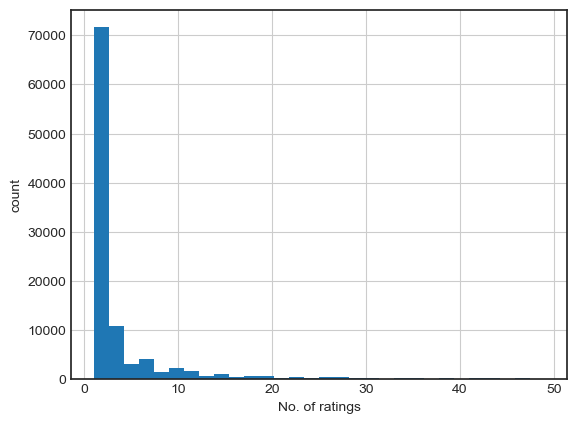

In [49]:
# Let's see how they are distributed.

# user distribution - users with more than 50 ratings removed
user_hist = Top_users.where(Top_users<50)
user_hist.hist(bins=30)
plt.xlabel('No. of ratings')
plt.ylabel('count')
plt.show()

It looks like by far the most frequent events are users with only 1 or 2 rating entries. We can see that the 'Top users' with thousands of ratings are significant outliers.

This becomes clear if we make the same histogram with a cutoff for users with a minimum of 1000 ratings.

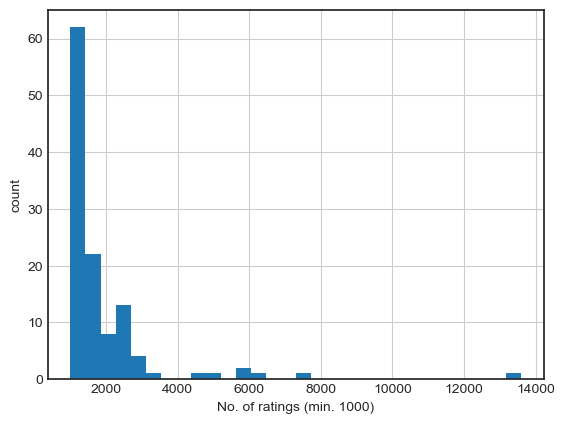

In [50]:
# only users with more than 1000 ratings
Top_user_hist = Top_users.where(Top_users>1000)
Top_user_hist.hist(bins=30)
plt.xlabel('No. of ratings (min. 1000)')
plt.ylabel('count')
plt.show()

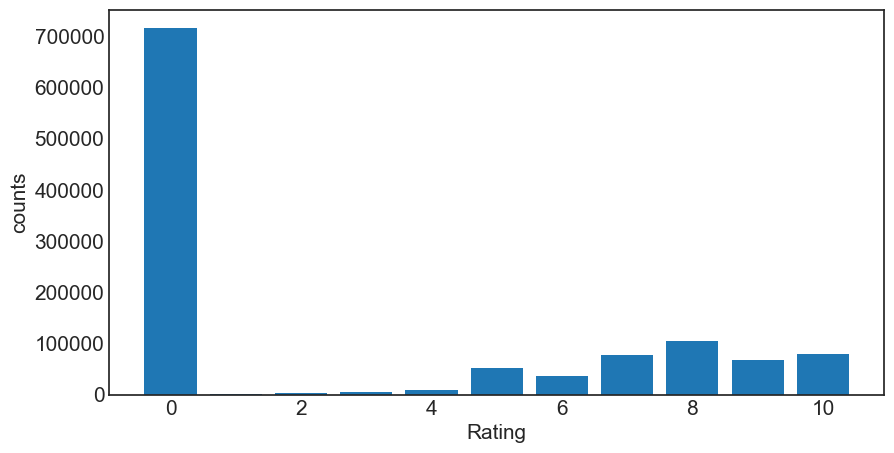

In [51]:
# Let's see what the distribution of ratings looks like.
Rating = ratings['book_rating'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
plt.rcParams.update({'font.size': 15}) # Set larger plot font size
plt.bar(Rating.index, Rating.values)
plt.xlabel('Rating')
plt.ylabel('counts')
plt.show()

In [52]:
print(f'Size of book_ratings before removing zero ratings: {len(ratings)}')


Size of book_ratings before removing zero ratings: 1149780


In [53]:
book_ratings = ratings[ratings['book_rating'] != 0]
print(f'Size of book_ratings after removing zero ratings: {len(book_ratings)}')

Size of book_ratings after removing zero ratings: 433671


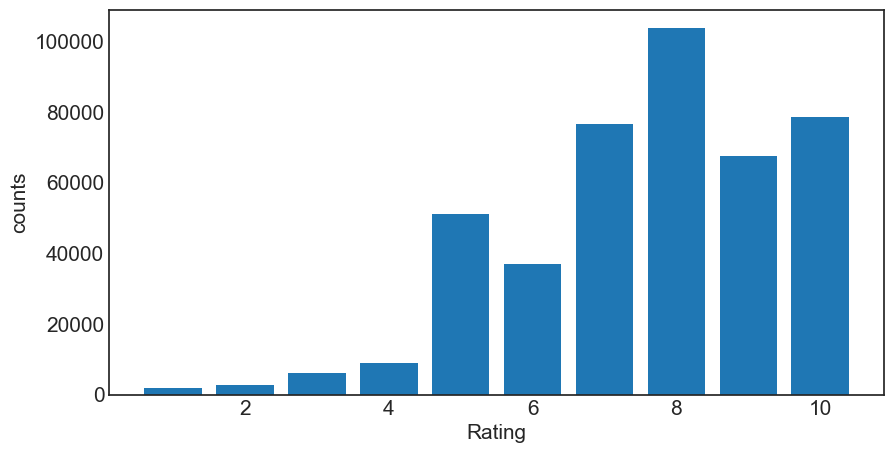

In [54]:
rtg = book_ratings['book_rating'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.rcParams.update({'font.size': 15}) # Set larger plot font size
plt.bar(rtg.index, rtg.values)
plt.xlabel('Rating')
plt.ylabel('counts')
plt.show()

In [55]:
books[['ISBN']].isnull().sum()

ISBN    0
dtype: int64

In [56]:
books[['ISBN']].duplicated().any().sum()

0

In [57]:
ratings[['isbn']].isnull().sum()

isbn    0
dtype: int64

In [58]:
ratings[['isbn']].duplicated().any().sum()

1

In [59]:
ratings[['user_id']].isnull().sum()

user_id    0
dtype: int64

In [60]:
users[['user_id']].isnull().sum()

user_id    0
dtype: int64

In [61]:
ratings[['user_id']].duplicated().any().sum()

1

In [62]:
users[['user_id']].duplicated().any().sum()

0

In [63]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [64]:
books.columns = books.columns.str.strip().str.lower().str.replace('-', '_')
books.head()

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [65]:
ratings.columns

Index(['user_id', 'isbn', 'book_rating'], dtype='object')

In [66]:
users.columns

Index(['user_id', 'location', 'age', 'city', 'state', 'country'], dtype='object')

In [67]:
# Merge the book and ratings datasets based on the common ISBN column
book_ratings_df = pd.merge(books, ratings, on='isbn')

# Merge the resulting dataframe with the users dataset based on the common user-id column
merged_df = pd.merge(book_ratings_df, users, on='user_id')




In [68]:
merged_df

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,user_id,book_rating,location,age,city,state,country
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0,"stockton, california, usa",18.0,stockton,california,usa
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",NaN,timmins,ontario,canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,8,0,"timmins, ontario, canada",NaN,timmins,ontario,canada
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,8,0,"timmins, ontario, canada",NaN,timmins,ontario,canada
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,8,0,"timmins, ontario, canada",NaN,timmins,ontario,canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031131,087004124X,Anthem,Ayn Rand,1966.0,Caxton Press,http://images.amazon.com/images/P/087004124X.0...,http://images.amazon.com/images/P/087004124X.0...,http://images.amazon.com/images/P/087004124X.0...,259589,8,"venice, florida, usa",19.0,venice,florida,usa
1031132,158243123X,A Student of Weather,Elizabeth Hay,2001.0,Counterpoint Press,http://images.amazon.com/images/P/158243123X.0...,http://images.amazon.com/images/P/158243123X.0...,http://images.amazon.com/images/P/158243123X.0...,259591,8,"tioga, pennsylvania, usa",39.0,tioga,pennsylvania,usa
1031133,8485900057,Rimas y leyendas (ClÃ¡sicos Fraile ; 3),Gustavo Adolfo BÃ©cquer,1981.0,Ediciones Fraile,http://images.amazon.com/images/P/8485900057.0...,http://images.amazon.com/images/P/8485900057.0...,http://images.amazon.com/images/P/8485900057.0...,259614,10,"madrid, madrid, spain",22.0,madrid,madrid,spain
1031134,0838934854,Anglo-American Cataloguing Rules,Michael Gorman,1998.0,American Library Association,http://images.amazon.com/images/P/0838934854.0...,http://images.amazon.com/images/P/0838934854.0...,http://images.amazon.com/images/P/0838934854.0...,259679,6,"grand prairie, texas, usa",27.0,grand prairie,texas,usa


In [69]:
merged_df.isnull().sum()

isbn                        0
book_title                  0
book_author                 2
year_of_publication     14013
publisher                   2
image_url_s                 0
image_url_m                 0
image_url_l                 4
user_id                     0
book_rating                 0
location                    0
age                    282469
city                        0
state                       0
country                 24185
dtype: int64

In [70]:
merged_df.duplicated().any().sum()

0

In [71]:
merged_df[['isbn']].isnull().sum()

isbn    0
dtype: int64

In [72]:
merged_df[['user_id']].isnull().sum()

user_id    0
dtype: int64

In [73]:
merged_df[['isbn']].duplicated().any().sum()

1

In [74]:
merged_df[['user_id']].duplicated().any().sum()

1

In [75]:
# Assuming merged_df is your DataFrame
duplicated_rows = merged_df[merged_df.duplicated(['user_id'], keep=False)]

# Display the duplicated rows
print("Duplicated Rows:")
print(duplicated_rows)

Duplicated Rows:
               isbn                                         book_title  \
1        0002005018                                       Clara Callan   
2        0060973129                               Decision in Normandy   
3        0374157065  Flu: The Story of the Great Influenza Pandemic...   
4        0393045218                             The Mummies of Urumchi   
5        0399135782                             The Kitchen God's Wife   
...             ...                                                ...   
1031110  1853716154                   Lucy Sullivan Is Getting Married   
1031118  345386431X                                   Zeit ohne Worte.   
1031119  3548248667                               HeimwÃ?Â¤rts. Roman.   
1031121  3593358069  Die Entscheidung liegt bei dir. Wege aus der a...   
1031122  8806151681                                 Lessico Famigliare   

                  book_author  year_of_publication                publisher  \
1        Richar

In [76]:
duplicated_rows = merged_df[merged_df.duplicated(['user_id', 'isbn'], keep=False)]

# Display the duplicated rows
print("Duplicated Rows based on user_id and isbn:")
print(duplicated_rows)

Duplicated Rows based on user_id and isbn:
Empty DataFrame
Columns: [isbn, book_title, book_author, year_of_publication, publisher, image_url_s, image_url_m, image_url_l, user_id, book_rating, location, age, city, state, country]
Index: []


In [77]:
merged_df.dtypes

isbn                    object
book_title              object
book_author             object
year_of_publication    float64
publisher               object
image_url_s             object
image_url_m             object
image_url_l             object
user_id                  int64
book_rating              int64
location                object
age                    float64
city                    object
state                   object
country                 object
dtype: object

In [78]:
top_user_countries = users['country'].value_counts().head(3).index.tolist()
for country in top_user_countries:
    top_5_books = book_ratings_df[book_ratings_df['user_id'].isin(users[users['country'] == country]['user_id'])]['book_title'].value_counts().head(5)
    print(f'Top 5 books in {country}:')
    print(top_5_books)

Top 5 books in  usa:
book_title
Wild Animus                  1196
The Lovely Bones: A Novel     932
The Da Vinci Code             709
A Painted House               702
The Secret Life of Bees       672
Name: count, dtype: int64
Top 5 books in  canada:
book_title
Wild Animus                              234
The Lovely Bones: A Novel                118
The Pelican Brief                         93
She's Come Undone (Oprah's Book Club)     88
The Summons                               87
Name: count, dtype: int64
Top 5 books in  united kingdom:
book_title
Wild Animus               199
Bridget Jones's Diary     105
Chocolat                   97
Memoirs of a Geisha Uk     73
Dead Famous                66
Name: count, dtype: int64


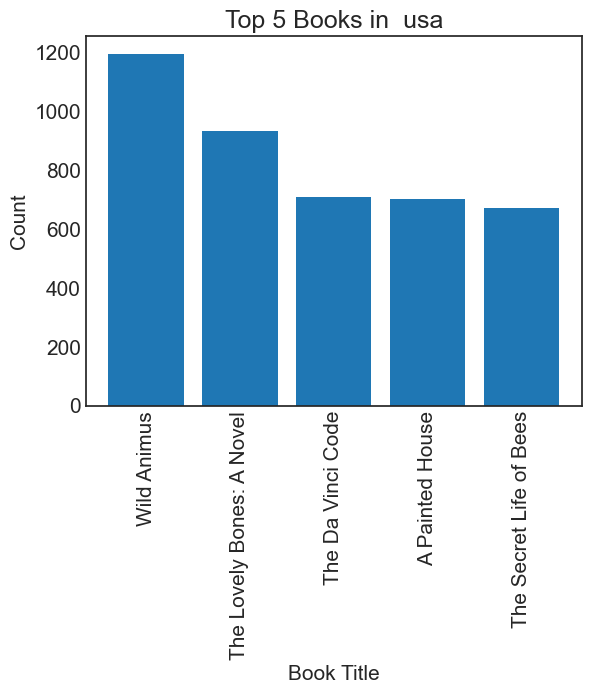

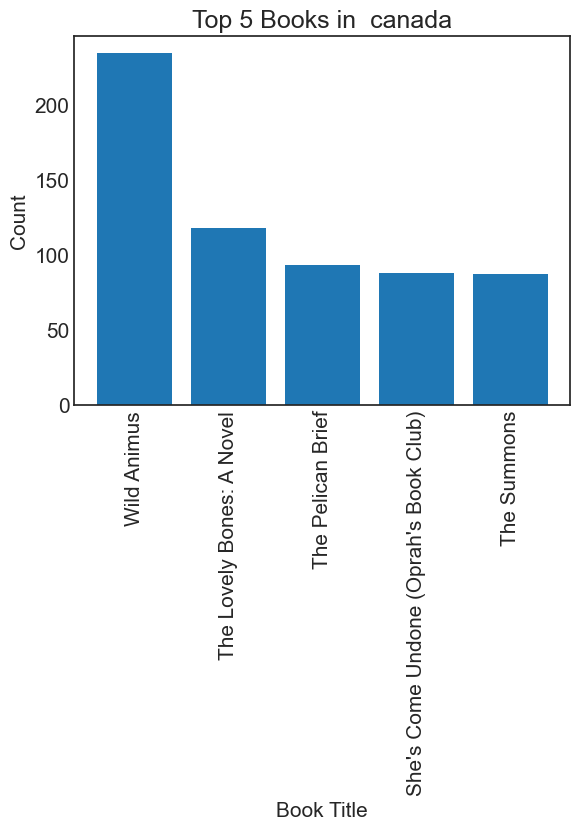

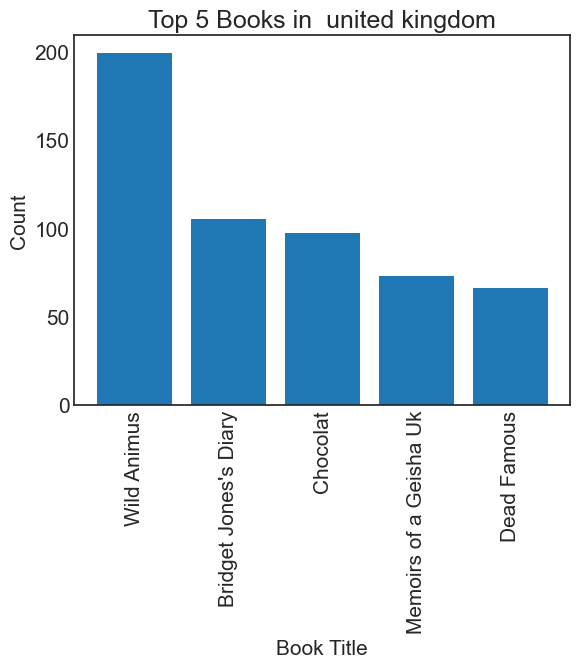

In [79]:
for country in top_user_countries:
    top_5_books = book_ratings_df[book_ratings_df['user_id'].isin(users[users['country'] == country]['user_id'])]['book_title'].value_counts().head(5)
    plt.bar(top_5_books.index, top_5_books.values)
    plt.xticks(rotation=90)
    plt.xlabel('Book Title')
    plt.ylabel('Count')
    plt.title(f'Top 5 Books in {country}')
    plt.show()

In [80]:
# Get the top 3 countries
top_countries = merged_df['country'].value_counts().head(3).index.tolist()

# Loop through the top 3 countries
for country in top_countries:
    # Group the merged dataset by book title and calculate the mean rating
    avg_ratings_by_book = merged_df[merged_df['country'] == country].groupby('book_title')['book_rating'].mean()
    # Get the top 5 books by average rating
    top_5_books = avg_ratings_by_book.sort_values(ascending=False).head(5)
    # Print the results
    print(f'Top 5 books by average rating in {country}:')
    print(top_5_books)

Top 5 books by average rating in  usa:
book_title
The Book of the Secrets (Book of the Secrets)                         10.0
The BABY SITTER BURGLARIES (NANCY DREW 129) (NANCY DREW ON CAMPUS)    10.0
Dumped: When You are Unexpectedly Single                              10.0
The BIG SNOW (REISSUE)                                                10.0
Duets #28 (New And...Improved?/Andrew In Excess) (Duets, 28)          10.0
Name: book_rating, dtype: float64
Top 5 books by average rating in  canada:
book_title
Coming Home (Heartland)                                                               10.0
The Immortal Highlander                                                               10.0
Tropic of Hockey: My Search for the Game in Unlikely Places                           10.0
Drinking With Bukowski: Recollections of the Poet Laureate of Skid Row                10.0
The Power Behind Your Eyes: Improving Your Eyesight With Integrated Vision Therapy    10.0
Name: book_rating, dtype: float64

In [81]:
print(sorted(users.age.unique()))

[nan, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0]


In [82]:
# Defining the age bins
age_bins = [5, 15, 25, 35, 45, 55, 65, 75, 85, 95, 105]

# Defining the age bin labels
age_labels = ['5-15', '15-25', '25-35', '35-45', '45-55', '55-65', '65-75', '75-85', '85-95', '95-105']

# Adding a new column
merged_df['age_group'] = pd.cut(merged_df['age'], bins=age_bins, labels=age_labels)

#  top 3 countries
top_user_countries = users['country'].value_counts().head(3).index.tolist()

# Loop through the top 3 countries
for country in top_user_countries:
    # Loop through the age groups
    for age_group in age_labels:
        # Get the top 5 books read by users in the current age group and country
        top_5_books = merged_df[(merged_df['country'] == country) & (merged_df['age_group'] == age_group)]['book_title'].value_counts().head(5)
        # Print the results
        print(f'Top 5 books in {age_group} age group from {country}:')
        print(top_5_books)

Top 5 books in 5-15 age group from  usa:
book_title
And Then There Were None : A Novel                                  29
Wild Animus                                                         22
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))    22
Harry Potter and the Chamber of Secrets (Book 2)                    21
Harry Potter and the Prisoner of Azkaban (Book 3)                   19
Name: count, dtype: int64
Top 5 books in 15-25 age group from  usa:
book_title
Wild Animus                                                         187
The Lovely Bones: A Novel                                           106
The Catcher in the Rye                                               88
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))     84
Harry Potter and the Chamber of Secrets (Book 2)                     77
Name: count, dtype: int64
Top 5 books in 25-35 age group from  usa:
book_title
Wild Animus                   316
The Lovely Bones: A Novel     214
The Nan

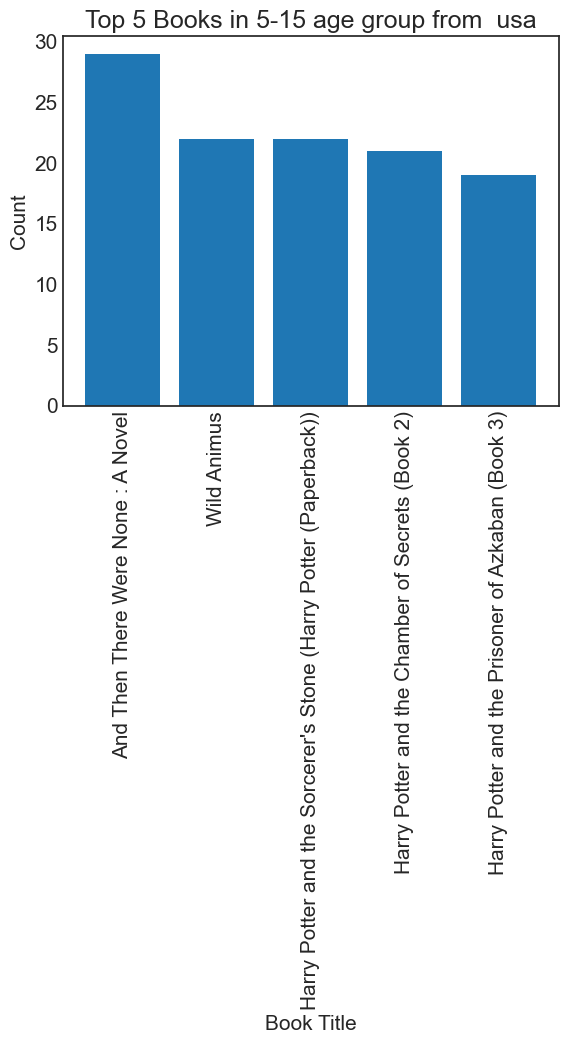

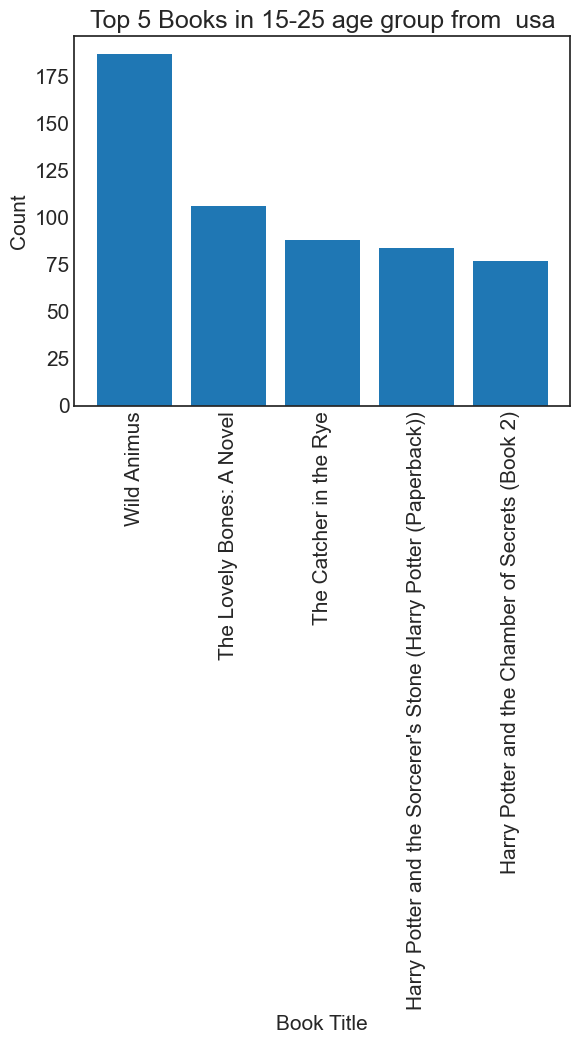

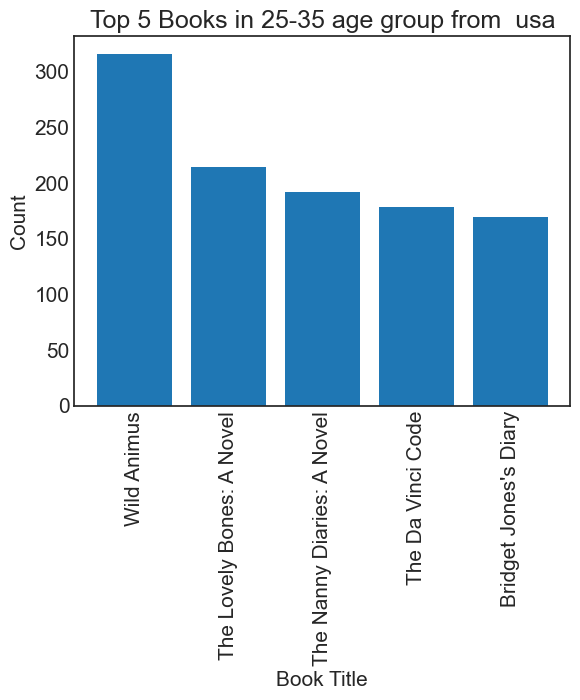

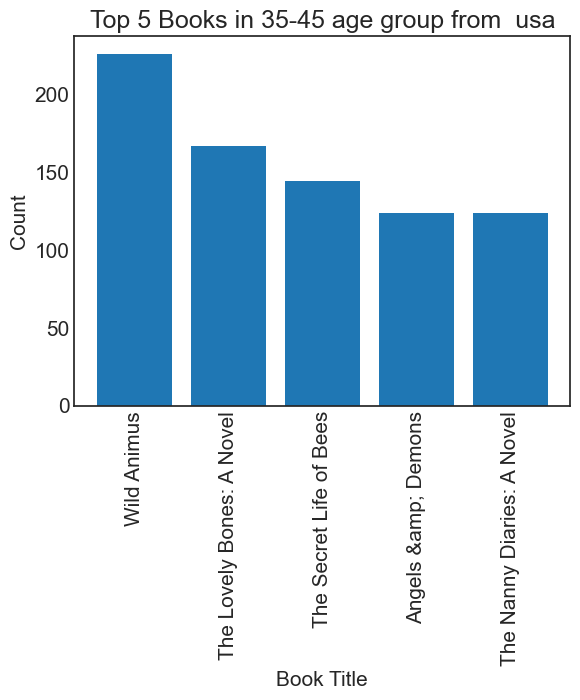

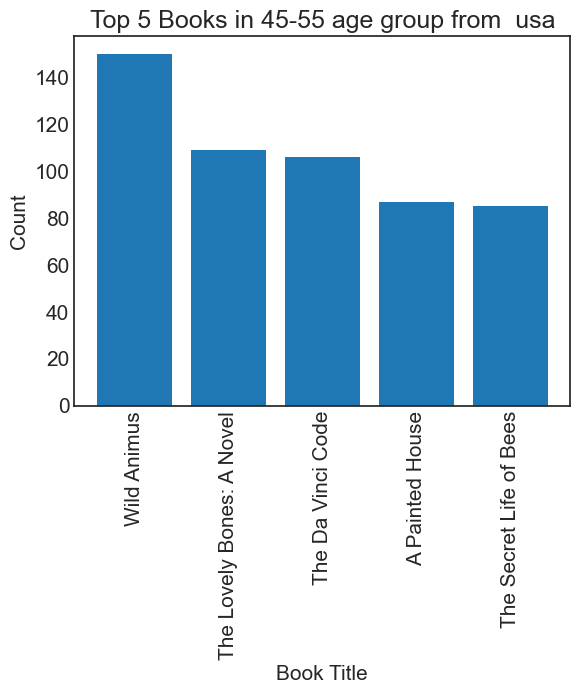

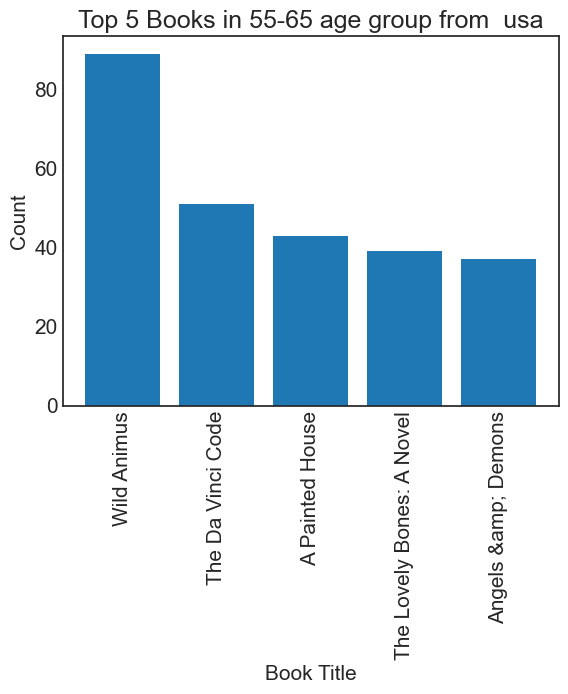

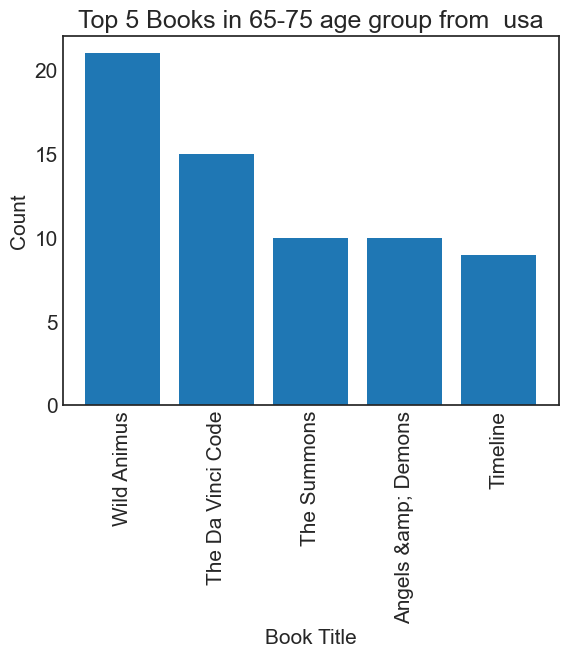

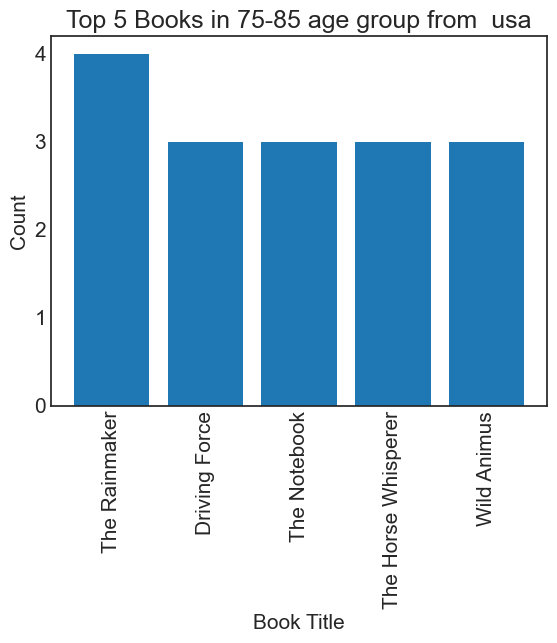

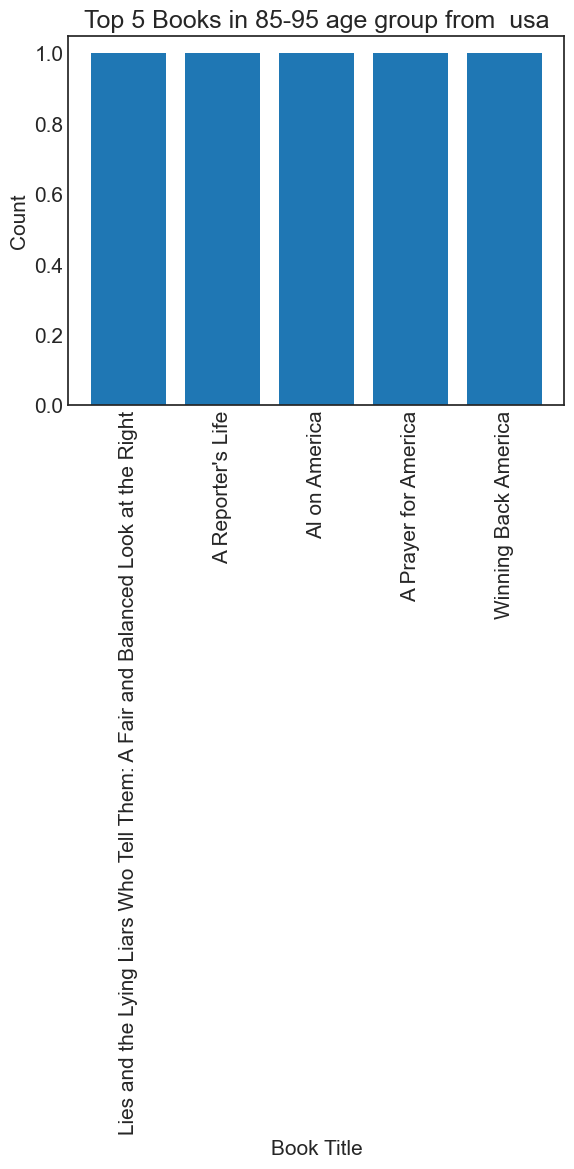

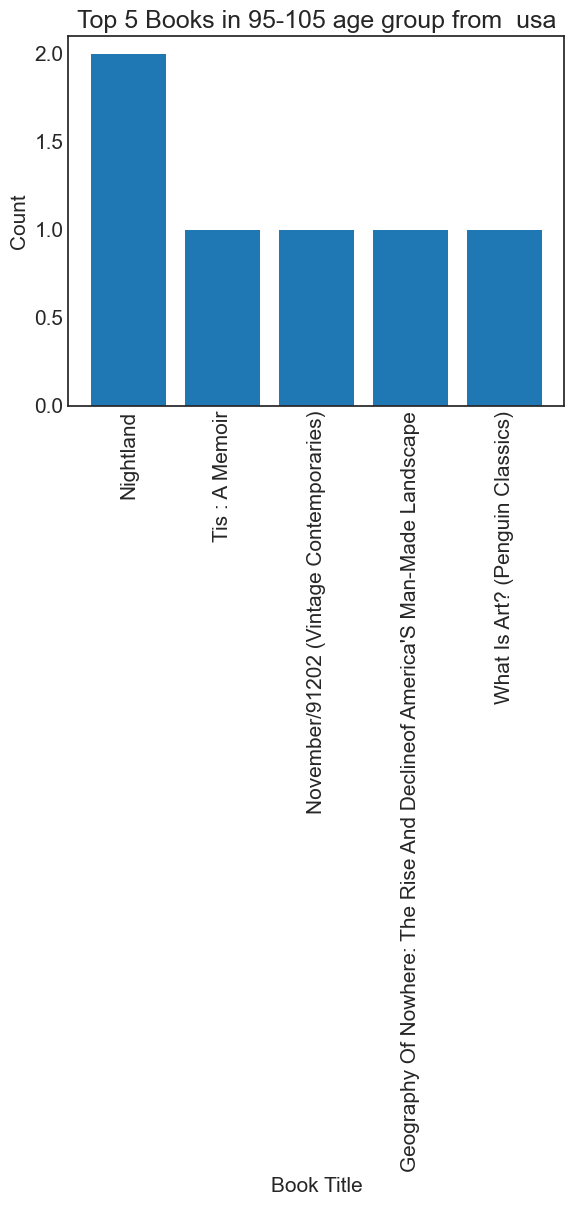

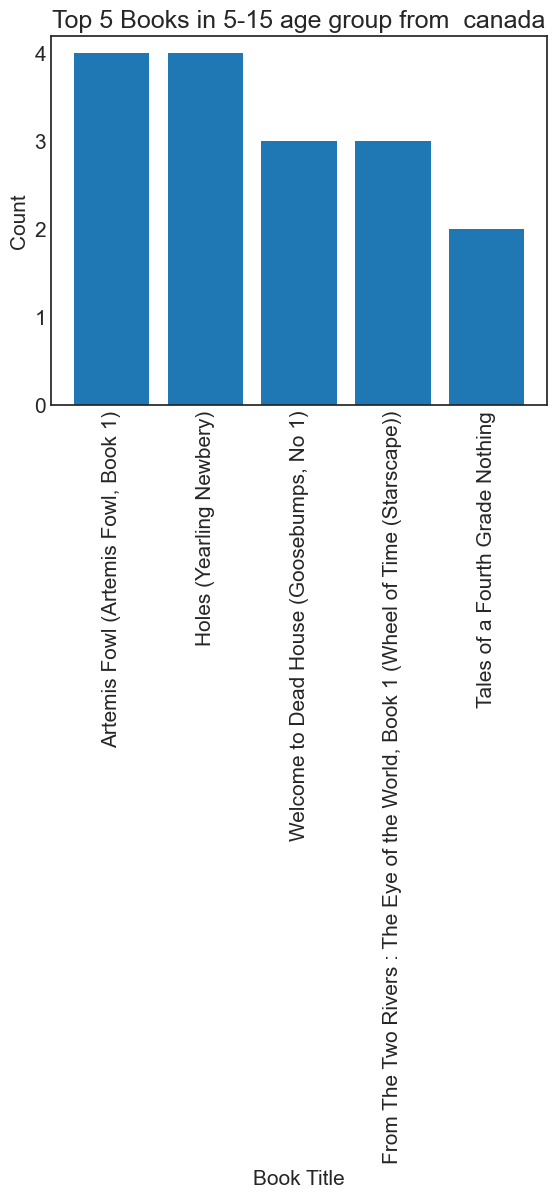

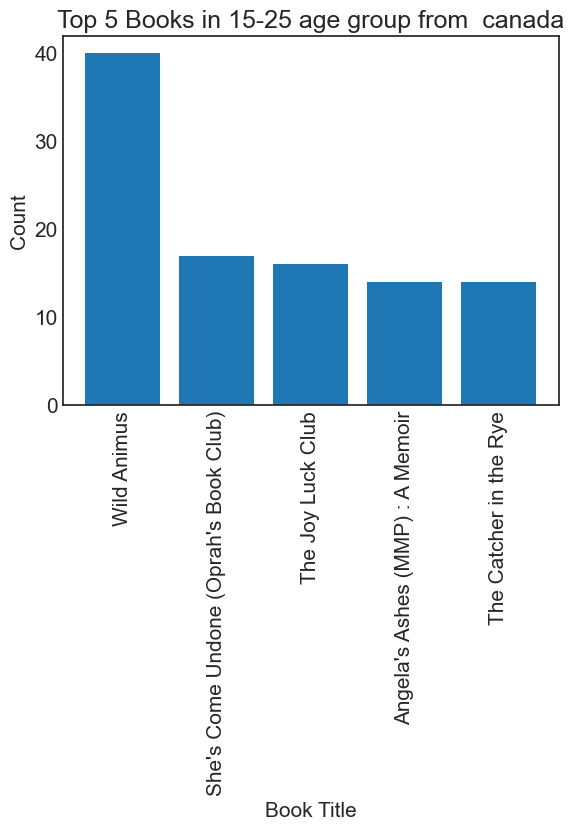

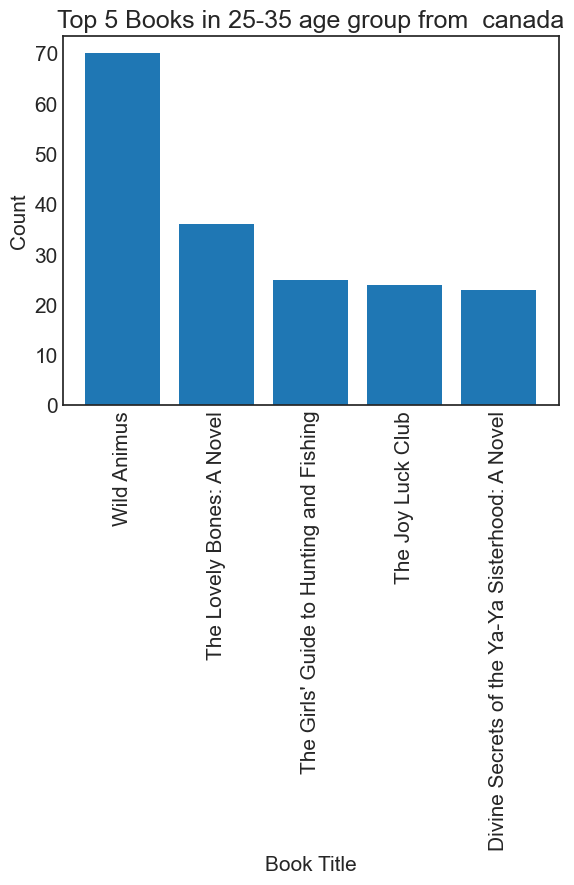

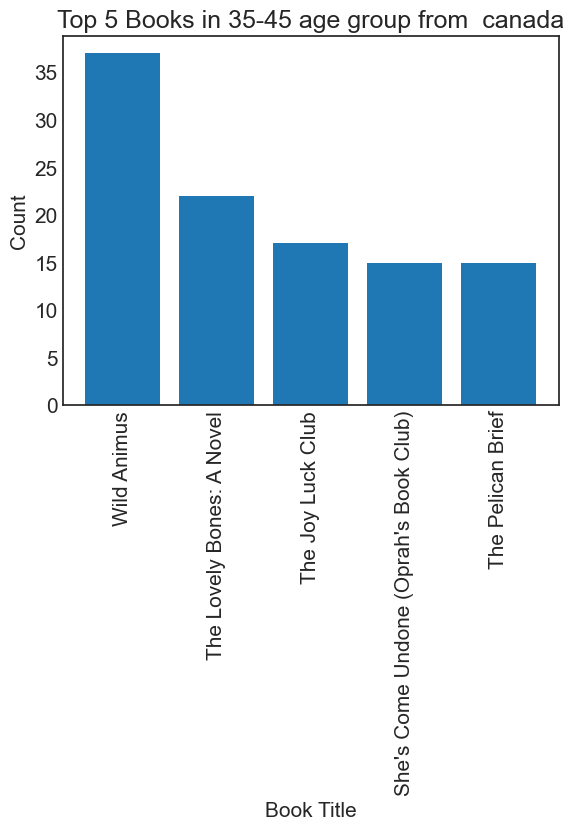

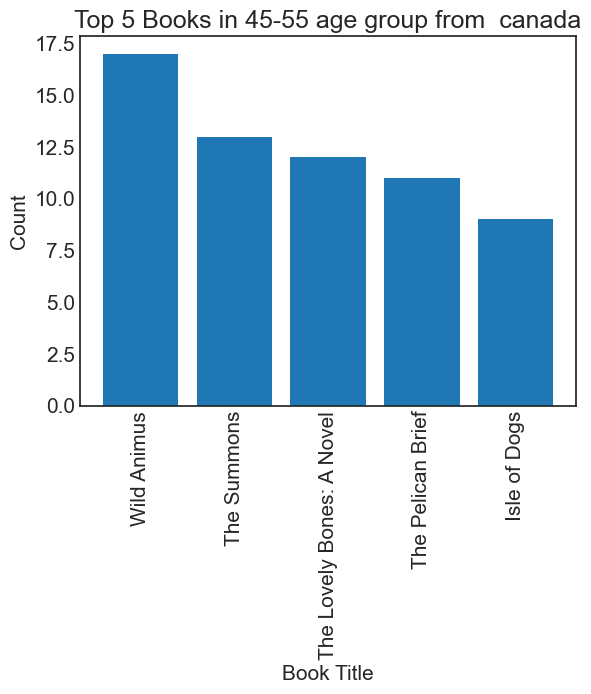

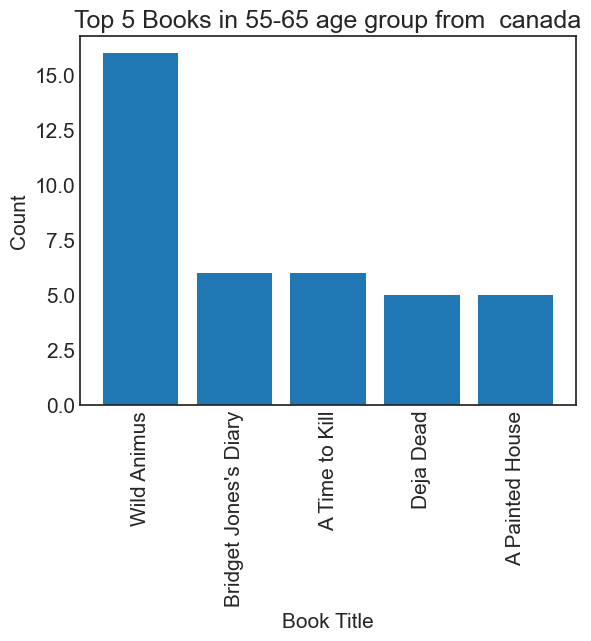

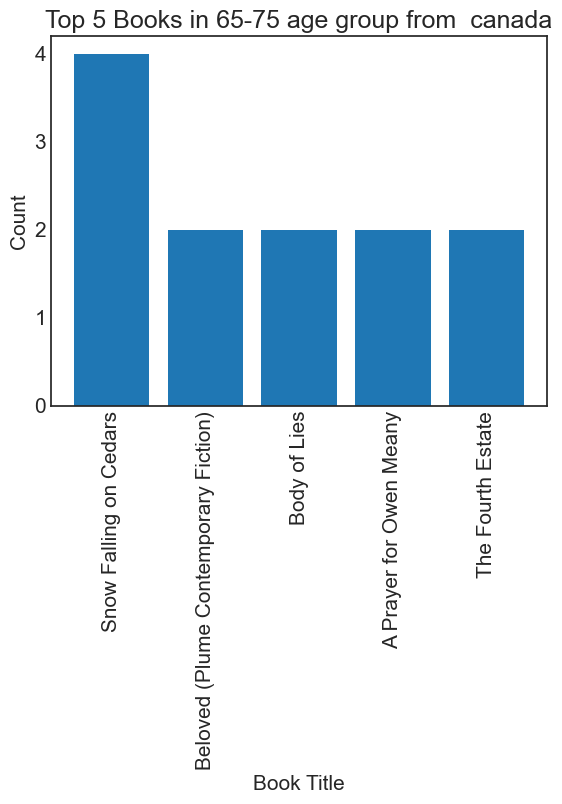

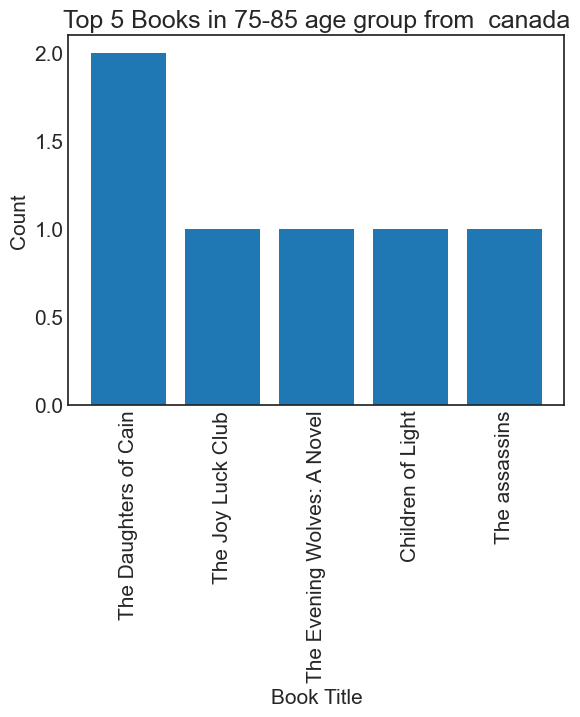

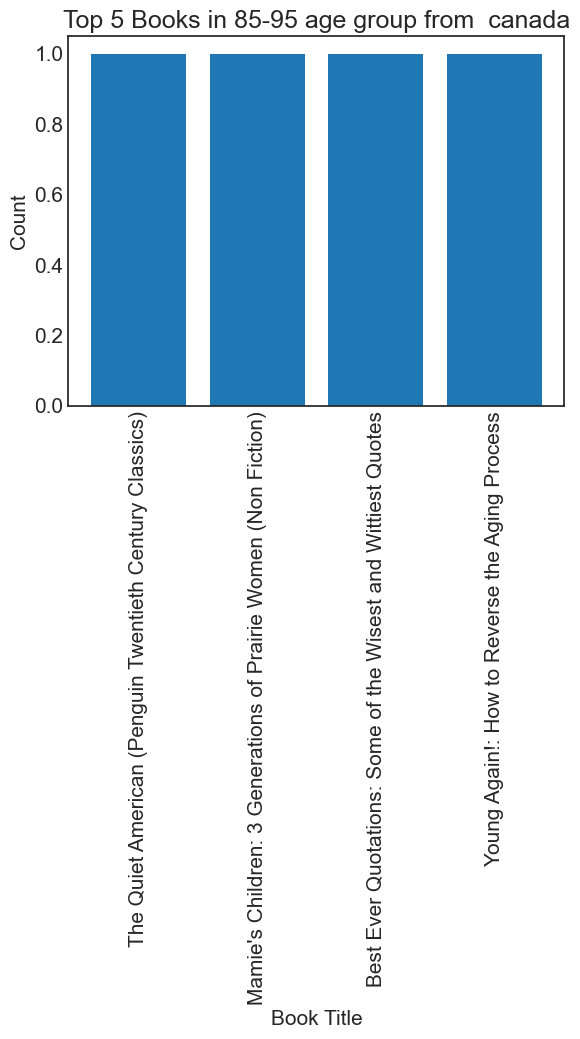

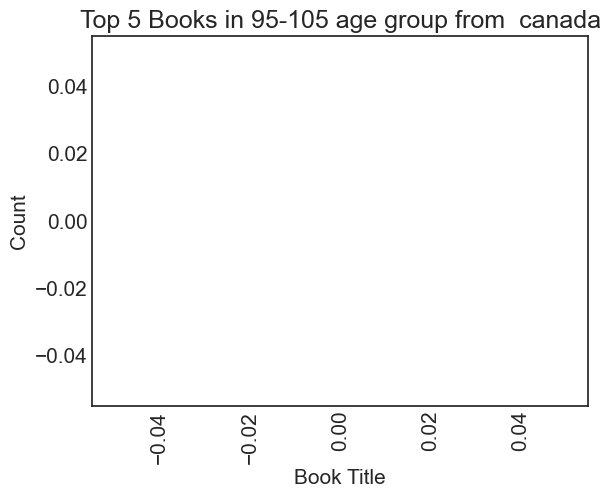

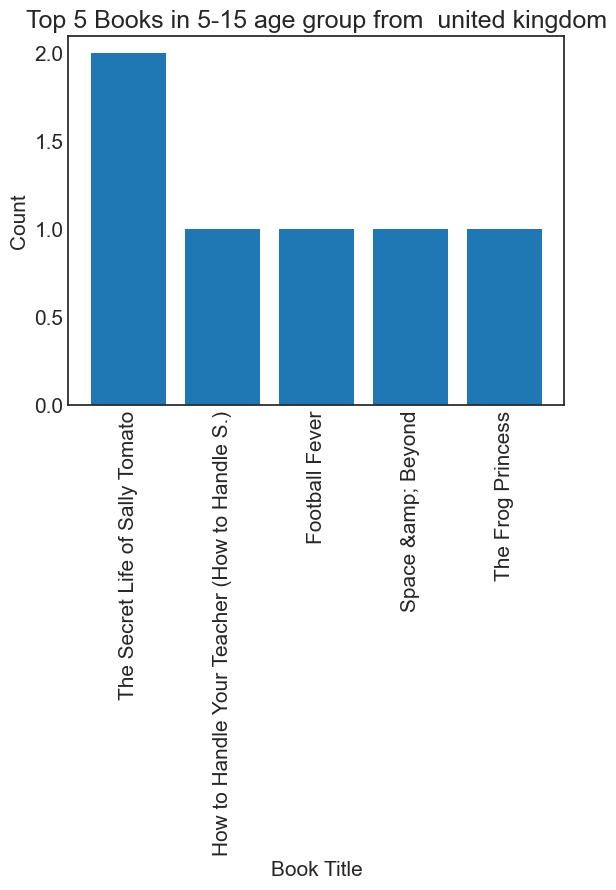

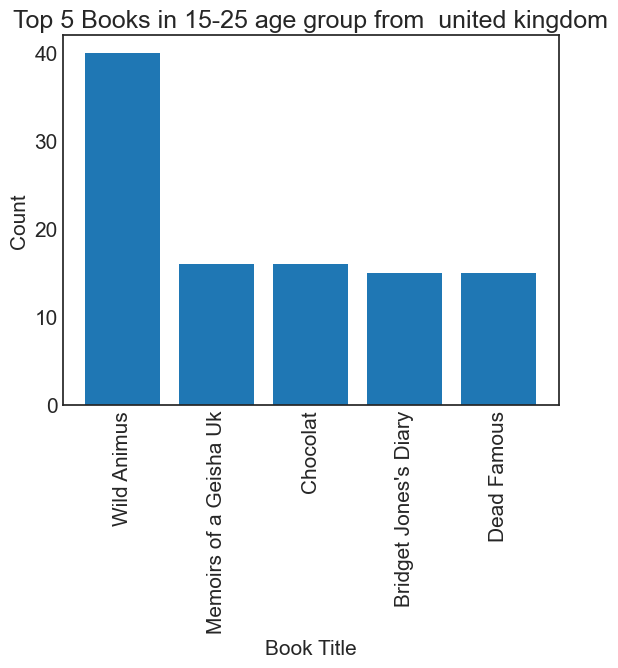

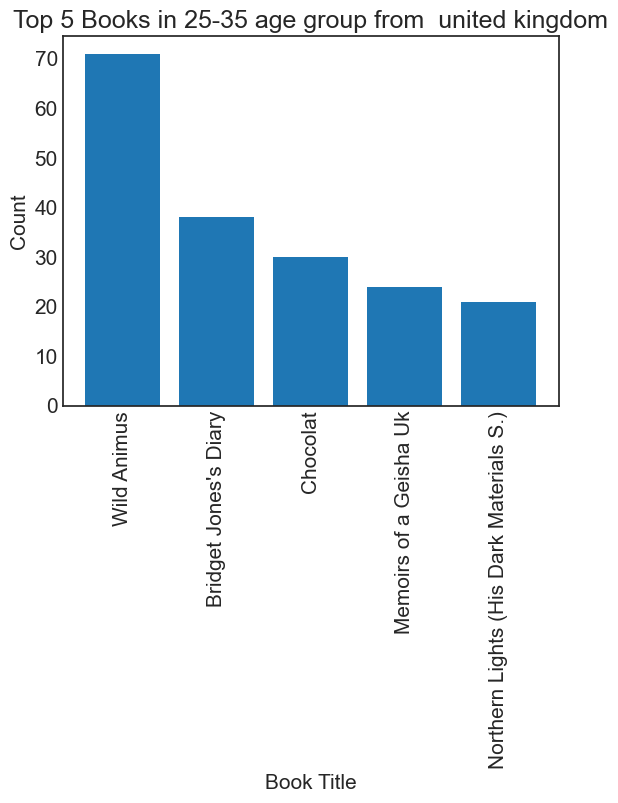

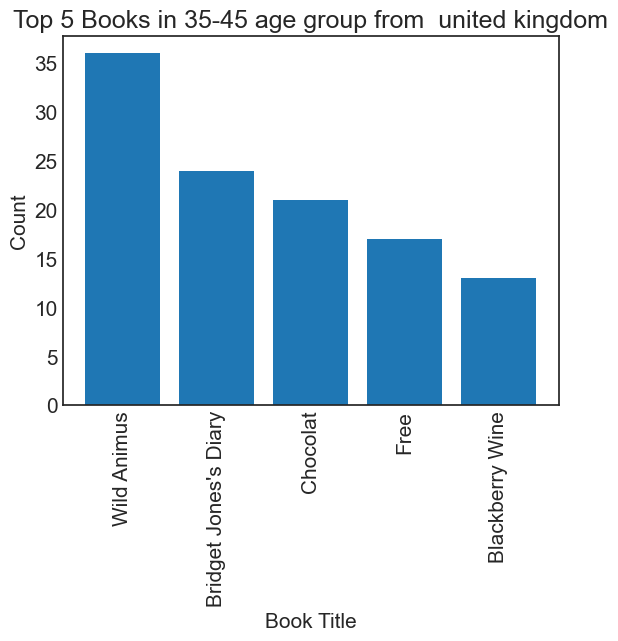

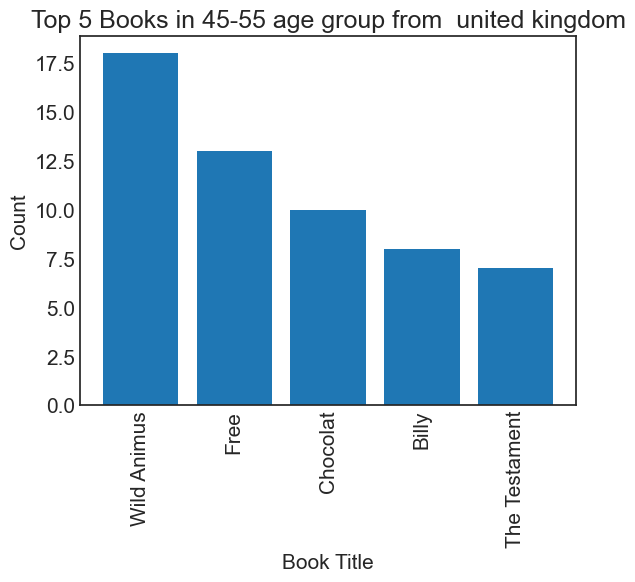

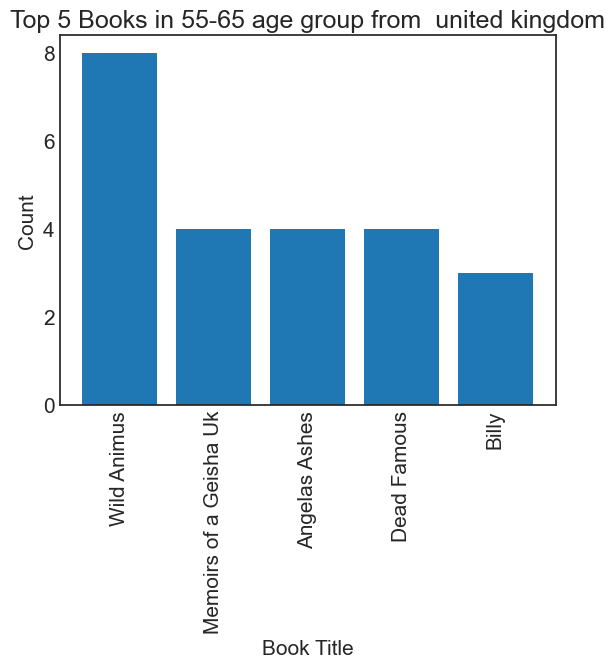

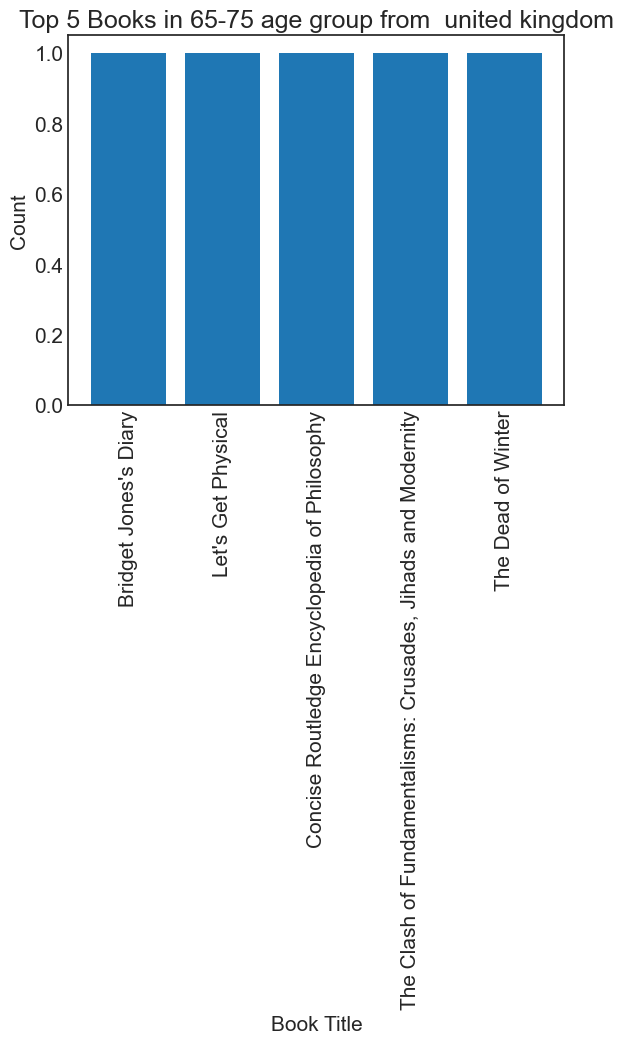

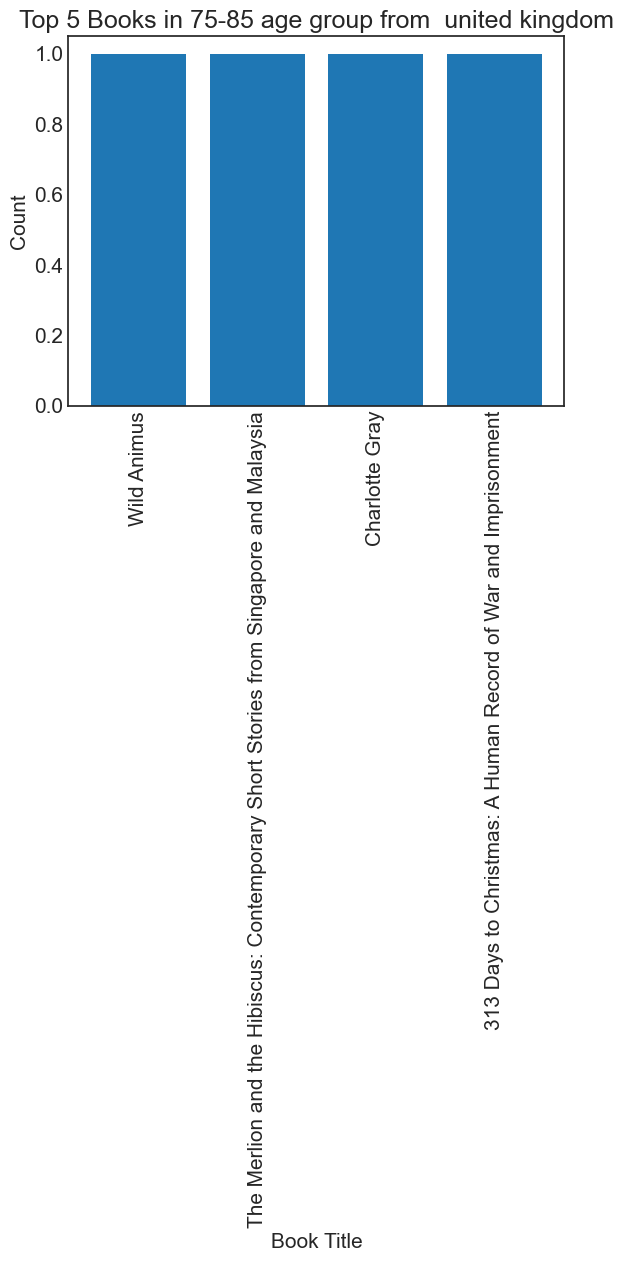

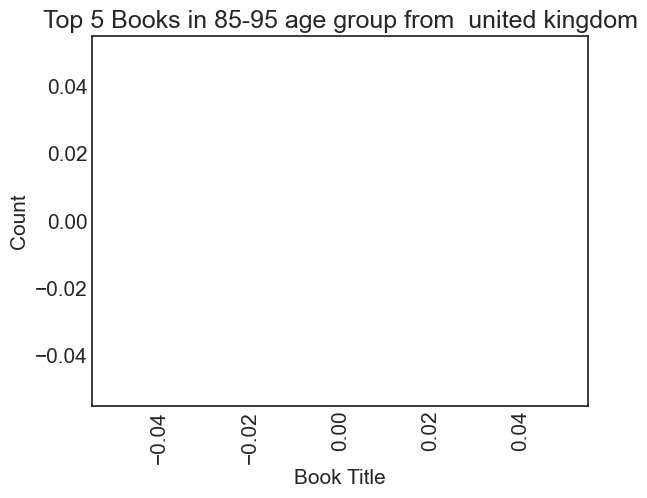

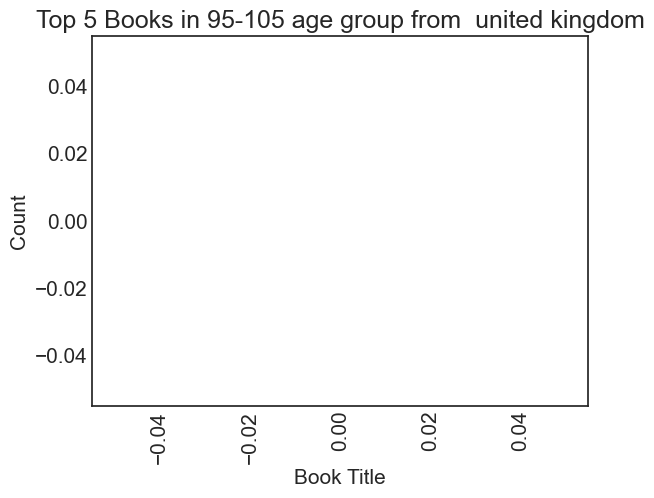

In [83]:
for country in top_user_countries:

    for age_group in age_labels:

        top_5_books = merged_df[(merged_df['country'] == country) & (merged_df['age_group'] == age_group)]['book_title'].value_counts().head(5)

        plt.figure()
        plt.bar(top_5_books.index, top_5_books.values)
        plt.xticks(rotation=90)
        plt.xlabel('Book Title')
        plt.ylabel('Count')
        plt.title(f'Top 5 Books in {age_group} age group from {country}')
        plt.show()

In [84]:
#Code for Analyzing Rating Variations by Age Group

In [85]:
merged_df.columns

Index(['isbn', 'book_title', 'book_author', 'year_of_publication', 'publisher',
       'image_url_s', 'image_url_m', 'image_url_l', 'user_id', 'book_rating',
       'location', 'age', 'city', 'state', 'country', 'age_group'],
      dtype='object')

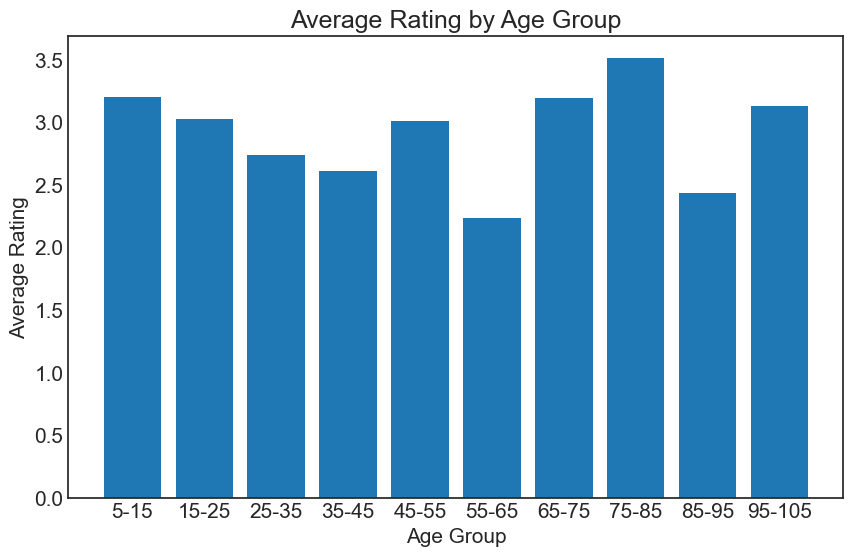

In [86]:
# Calculate the average rating for each age group
average_ratings_by_age = merged_df.groupby('age_group')['book_rating'].mean().reset_index()
# Plot the average ratings for each age group
plt.figure(figsize=(10, 6))
plt.bar(average_ratings_by_age['age_group'], average_ratings_by_age['book_rating'])
plt.xlabel('Age Group')
plt.ylabel('Average Rating')
plt.title('Average Rating by Age Group')
plt.show()

This analysis is useful for understanding the reading preferences of different age groups and can be used in recommendation systems to suggest books by specific authors to the corresponding age groups. It provides valuable insights for book publishers, marketers, and retailers to target their audience effectively and offer personalized recommendations.

In [87]:
### POPULARITY BASED RECOMMENDATION SYSTEM
book_ratings_df = pd.merge(books, ratings, on='isbn')

In [88]:
book_ratings_df

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,user_id,book_rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,0
...,...,...,...,...,...,...,...,...,...,...
1031131,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988.0,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,276463,7
1031132,0525447644,From One to One Hundred,Teri Sloat,1991.0,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,276579,4
1031133,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004.0,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,276680,0
1031134,0192126040,Republic (World's Classics),Plato,1996.0,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,276680,0


In [89]:
book_ratings_df.shape

(1031136, 10)

In [90]:
num_rating_df = book_ratings_df.groupby('book_title').count()['book_rating'].reset_index()
num_rating_df.rename(columns = {'book_rating':'num_of_ratings'},inplace = True)
num_rating_df

,book_title,num_of_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [91]:
# Convert 'book_rating' to numeric, replacing non-numeric values with NaN
book_ratings_df['book_rating'] = pd.to_numeric(book_ratings_df['book_rating'], errors='coerce')

# Calculate the mean after handling non-numeric values
Avg_rating_df = book_ratings_df.groupby('book_title')['book_rating'].mean().reset_index()

# Rename the column to 'Avg_ratings'
Avg_rating_df.rename(columns={'book_rating': 'Avg_ratings'}, inplace=True)

# Display the resulting DataFrame
print(Avg_rating_df)


                                               book_title  Avg_ratings
0        A Light in the Storm: The Civil War Diary of ...     2.250000
1                                   Always Have Popsicles     0.000000
2                    Apple Magic (The Collector's series)     0.000000
3        Ask Lily (Young Women of Faith: Lily Series, ...     8.000000
4        Beyond IBM: Leadership Marketing and Finance ...     0.000000
...                                                   ...          ...
241066                                      Ã?Â?lpiraten.     0.000000
241067                     Ã?Â?rger mit Produkt X. Roman.     5.250000
241068                                Ã?Â?sterlich leben.     7.000000
241069                              Ã?Â?stlich der Berge.     2.666667
241070                                  Ã?Â?thique en toc     4.000000

[241071 rows x 2 columns]


In [92]:
popular_df = num_rating_df.merge(Avg_rating_df,on = 'book_title')
popular_df

,book_title,num_of_ratings,Avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [93]:
# we are only considering those books whose num_ratings are greater than 250

popular_df = popular_df[popular_df['num_of_ratings']>=250].sort_values('Avg_ratings',ascending = False).head(50)

In [94]:
popular_df

,book_title,num_of_ratings,Avg_ratings
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80441,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80414,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
191612,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117
187377,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370
80445,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652
211384,"The Two Towers (The Lord of the Rings, Part 2)",260,4.880769
219741,To Kill a Mockingbird,510,4.700000


In [95]:
popular_df = popular_df.merge(books,on = 'book_title').drop_duplicates('book_title')[['book_title','book_author','year_of_publication','image_url_m','num_of_ratings','Avg_ratings']]

In [96]:
popular_df

,book_title,book_author,year_of_publication,image_url_m,num_of_ratings,Avg_ratings
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,1999.0,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000.0,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,1998.0,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003.0,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,2000.0,http://images.amazon.com/images/P/0439064872.0...,556,5.183453
16,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,1986.0,http://images.amazon.com/images/P/0345339681.0...,281,5.007117
17,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,1986.0,http://images.amazon.com/images/P/0345339703.0...,368,4.948370
26,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999.0,http://images.amazon.com/images/P/059035342X.0...,575,4.895652
28,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,1986.0,http://images.amazon.com/images/P/0345339711.0...,260,4.880769
39,To Kill a Mockingbird,Harper Lee,1988.0,http://images.amazon.com/images/P/0446310786.0...,510,4.700000


In [97]:
merged_df.columns

Index(['isbn', 'book_title', 'book_author', 'year_of_publication', 'publisher',
       'image_url_s', 'image_url_m', 'image_url_l', 'user_id', 'book_rating',
       'location', 'age', 'city', 'state', 'country', 'age_group'],
      dtype='object')

In [98]:
merged_df.isna().sum()

isbn                        0
book_title                  0
book_author                 2
year_of_publication     14013
publisher                   2
image_url_s                 0
image_url_m                 0
image_url_l                 4
user_id                     0
book_rating                 0
location                    0
age                    282469
city                        0
state                       0
country                 24185
age_group              282628
dtype: int64

In [99]:
columns_to_drop = ['image_url_s', 'image_url_m','location','city','state']
merged_df.drop(columns=columns_to_drop, inplace=True)

In [100]:
merged_df.head()

,isbn,book_title,book_author,year_of_publication,publisher,image_url_l,user_id,book_rating,age,country,age_group
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,2,0,18.0,usa,15-25
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,8,5,NaN,canada,NaN
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,8,0,NaN,canada,NaN
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,8,0,NaN,canada,NaN
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &; Company,http://images.amazon.com/images/P/0393045218.0...,8,0,NaN,canada,NaN


In [101]:
merged_df = merged_df.dropna(subset=['age', 'country','age_group'])
merged_df.isna().sum()

isbn                       0
book_title                 0
book_author                2
year_of_publication    10155
publisher                  2
image_url_l                2
user_id                    0
book_rating                0
age                        0
country                    0
age_group                  0
dtype: int64

In [102]:
merged_df.shape

(737962, 11)

In [103]:
num_rating_df = merged_df.groupby('book_title').count()['book_rating'].reset_index()
num_rating_df.rename(columns = {'book_rating':'num_of_ratings'},inplace = True)
num_rating_df

,book_title,num_of_ratings
0,A Light in the Storm: The Civil War Diary of ...,1
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Dark Justice,1
...,...,...
202988,Ã?Â?lpiraten.,1
202989,Ã?Â?rger mit Produkt X. Roman.,4
202990,Ã?Â?sterlich leben.,1
202991,Ã?Â?stlich der Berge.,3


In [104]:
# Convert 'book_rating' to numeric, replacing non-numeric values with NaN
book_ratings_df['book_rating'] = pd.to_numeric(book_ratings_df['book_rating'], errors='coerce')

# Calculate the mean after handling non-numeric values
Avg_rating_df = book_ratings_df.groupby('book_title')['book_rating'].mean().reset_index()

# Rename the column to 'Avg_ratings'
Avg_rating_df.rename(columns={'book_rating': 'Avg_ratings'}, inplace=True)

# Display the resulting DataFrame
print(Avg_rating_df)


                                               book_title  Avg_ratings
0        A Light in the Storm: The Civil War Diary of ...     2.250000
1                                   Always Have Popsicles     0.000000
2                    Apple Magic (The Collector's series)     0.000000
3        Ask Lily (Young Women of Faith: Lily Series, ...     8.000000
4        Beyond IBM: Leadership Marketing and Finance ...     0.000000
...                                                   ...          ...
241066                                      Ã?Â?lpiraten.     0.000000
241067                     Ã?Â?rger mit Produkt X. Roman.     5.250000
241068                                Ã?Â?sterlich leben.     7.000000
241069                              Ã?Â?stlich der Berge.     2.666667
241070                                  Ã?Â?thique en toc     4.000000

[241071 rows x 2 columns]


In [105]:
popular_df = num_rating_df.merge(Avg_rating_df,on = 'book_title')
popular_df

,book_title,num_of_ratings,Avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,1,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Dark Justice,1,10.000000
...,...,...,...
202988,Ã?Â?lpiraten.,1,0.000000
202989,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
202990,Ã?Â?sterlich leben.,1,7.000000
202991,Ã?Â?stlich der Berge.,3,2.666667


In [106]:
popular_df = popular_df.merge(merged_df,on = 'book_title').drop_duplicates('book_title')[['book_title','book_author','year_of_publication','user_id','age_group','country','image_url_l','num_of_ratings','Avg_ratings']]

In [107]:
popular_df

,book_title,book_author,year_of_publication,user_id,age_group,country,image_url_l,num_of_ratings,Avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,Karen Hesse,1999.0,55927,15-25,usa,http://images.amazon.com/images/P/0590567330.0...,1,2.250000
1,Always Have Popsicles,Rebecca Harvin,1994.0,172742,35-45,usa,http://images.amazon.com/images/P/0964147726.0...,1,0.000000
2,Apple Magic (The Collector's series),Martina Boudreau,1984.0,198711,55-65,usa,http://images.amazon.com/images/P/0942320093.0...,1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",Nancy N. Rue,2001.0,269557,35-45,usa,http://images.amazon.com/images/P/0310232546.0...,1,8.000000
4,Dark Justice,Jack Higgins,2004.0,98391,45-55,usa,http://images.amazon.com/images/P/0399151788.0...,1,10.000000
...,...,...,...,...,...,...,...,...,...
737951,Ã?Â?lpiraten.,Janwillem van de Wetering,2002.0,189389,35-45,germany,http://images.amazon.com/images/P/3499232499.0...,1,0.000000
737952,Ã?Â?rger mit Produkt X. Roman.,Joan Aiken,1987.0,35407,45-55,germany,http://images.amazon.com/images/P/325721538X.0...,4,5.250000
737956,Ã?Â?sterlich leben.,Anselm GrÃ?Â¼n,2001.0,256636,45-55,germany,http://images.amazon.com/images/P/3451274973.0...,1,7.000000
737957,Ã?Â?stlich der Berge.,David Guterson,2000.0,261105,45-55,switzerland,http://images.amazon.com/images/P/3442725739.0...,3,2.666667


In [108]:
popular_df.columns

Index(['book_title', 'book_author', 'year_of_publication', 'user_id',
       'age_group', 'country', 'image_url_l', 'num_of_ratings', 'Avg_ratings'],
      dtype='object')

In [109]:
# Step 1: Filter the dataset for a given user_id
user_id=int(input("Enter user_id: "))
user_data = popular_df[popular_df['user_id'] == user_id]
country = user_data['country'].values[0]
age_group = user_data['age_group'].values[0]

In [110]:
top_5_recommendations = popular_df[(popular_df['country'] == country) & (popular_df['age_group'] == age_group)] \
    .sort_values(by='Avg_ratings', ascending=False) \
    .head(5)[['book_title', 'book_author']]

print(f'User {user_id} from {country} in the age group {age_group} may like the following books:')
print(top_5_recommendations)

User 2 from  usa in the age group 15-25 may like the following books:
                                               book_title       book_author
527198  The Book of Romance: What Solomon Says About L...      Tommy Nelson
478460  So You Want to Be a Wizard (digest): The First...       Diane Duane
29071                         Absolute Truth? (Pack of 5)       Mark Ashton
608531                                   The Nols Cookery     Sukey Richard
103212     Charles A. Lindbergh: Lone Eagle (2nd Edition)  Walter L. Hixson


In [111]:
#POPULARITY BASED RS TAKING USER_ID AS INPUT
def popularity_recommendation(user_id, top_n=5):
    user_info = merged_df[merged_df['user_id'] == user_id].iloc[0]
    country = user_info['country']
    age_group = user_info['age_group']

    filtered_books = merged_df[(merged_df['country'] == country) & (merged_df['age_group'] == age_group)]
    avg_ratings = filtered_books.groupby('book_title')['book_rating'].mean().sort_values(ascending=False)

    user_rated_books = filtered_books[filtered_books['user_id'] == user_id]['book_title']
    avg_ratings = avg_ratings[~avg_ratings.index.isin(user_rated_books)]

    top_books = avg_ratings.head(top_n).index

    return country, age_group, top_books

user_id_input = int(input("Enter user ID: "))
user_country, user_age_group, top_books_recommendation = popularity_recommendation(user_id_input, top_n=5)

print(f"\nUser's Country: {user_country}")
print(f"User's Age Group: {user_age_group}")



print("\nTop 5 Popular Books Recommendation:")
for i, book_title in enumerate(top_books_recommendation, 1):
    book_info = merged_df[merged_df['book_title'] == book_title].iloc[0]
    print(f"{i}. Book Title: {book_title}")
    print(f"   Image URL: {book_info['image_url_l']}")


User's Country:  usa
User's Age Group: 15-25

Top 5 Popular Books Recommendation:
1. Book Title: The Minority Career Book
   Image URL: http://images.amazon.com/images/P/155850012X.01.LZZZZZZZ.jpg
2. Book Title: Elvis Presley Boulevard: From Sea to Shining Sea, Almost (Traveler)
   Image URL: http://images.amazon.com/images/P/0871132052.01.LZZZZZZZ.jpg
3. Book Title: The Seventh Moon
   Image URL: http://images.amazon.com/images/P/0553572318.01.LZZZZZZZ.jpg
4. Book Title: The Seventh Gate (Death Gate Cycle (Paperback))
   Image URL: http://images.amazon.com/images/P/055357325X.01.LZZZZZZZ.jpg
5. Book Title: Emily Dickinson Collected Poems (Courage Literary Classics)
   Image URL: http://images.amazon.com/images/P/1561380458.01.LZZZZZZZ.jpg


In [112]:
merged_df.columns

Index(['isbn', 'book_title', 'book_author', 'year_of_publication', 'publisher',
       'image_url_l', 'user_id', 'book_rating', 'age', 'country', 'age_group'],
      dtype='object')

In [113]:
#COLLABERATIVE FILTERING RECOMMENDATION SYSTEM

In [114]:
# Merge the book and ratings datasets based on the common ISBN column
book_ratings_df = pd.merge(books, ratings, on='isbn')

In [115]:
# Merge the resulting dataframe with the users dataset based on the common user-id column
merged_df = pd.merge(book_ratings_df, users, on='user_id')

filtering the data who(users) have rated more than 100 books

In [116]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031136 entries, 0 to 1031135
Data columns (total 15 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   isbn                 1031136 non-null  object 
 1   book_title           1031136 non-null  object 
 2   book_author          1031134 non-null  object 
 3   year_of_publication  1017123 non-null  float64
 4   publisher            1031134 non-null  object 
 5   image_url_s          1031136 non-null  object 
 6   image_url_m          1031136 non-null  object 
 7   image_url_l          1031132 non-null  object 
 8   user_id              1031136 non-null  int64  
 9   book_rating          1031136 non-null  int64  
 10  location             1031136 non-null  object 
 11  age                  748667 non-null   float64
 12  city                 1031136 non-null  object 
 13  state                1031136 non-null  object 
 14  country              1006951 non-null  object 
dty

In [117]:
x = merged_df.groupby('user_id').count()['book_rating'] > 100
users_rated_above_100 = x[x].index

In [118]:
filtered_ratings = merged_df[merged_df['user_id'].isin(users_rated_above_100)]

In [119]:
y = filtered_ratings.groupby('book_title').count()['book_rating'] >= 50
famous_books = y[y].index

In [120]:
famous_books

Index(['1984', '1st to Die: A Novel', '2010: Odyssey Two', '204 Rosewood Lane',
       '24 Hours', '2nd Chance', '4 Blondes', '84 Charing Cross Road',
       'A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper))',
       'A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash',
       ...
       'Without Remorse', 'Wizard and Glass (The Dark Tower, Book 4)',
       'Women Who Run with the Wolves',
       'Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players',
       'Wuthering Heights', 'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='book_title', length=1070)

In [121]:
final_ratings = filtered_ratings[filtered_ratings['book_title'].isin(famous_books)]

In [122]:
final_ratings

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,user_id,book_rating,location,age,city,state,country
81,0399135782,The Kitchen God's Wife,Amy Tan,1991.0,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,11676,9,"n/a, n/a, n/a",NaN,n/a,n/a,n/a
84,0440234743,The Testament,John Grisham,1999.0,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,11676,9,"n/a, n/a, n/a",NaN,n/a,n/a,n/a
85,0452264464,Beloved (Plume Contemporary Fiction),Toni Morrison,1994.0,Plume,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...,11676,8,"n/a, n/a, n/a",NaN,n/a,n/a,n/a
88,0971880107,Wild Animus,Rich Shapero,2004.0,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,11676,6,"n/a, n/a, n/a",NaN,n/a,n/a,n/a
89,0345402871,Airframe,Michael Crichton,1997.0,Ballantine Books,http://images.amazon.com/images/P/0345402871.0...,http://images.amazon.com/images/P/0345402871.0...,http://images.amazon.com/images/P/0345402871.0...,11676,0,"n/a, n/a, n/a",NaN,n/a,n/a,n/a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918745,155166674X,Between Friends,Debbie Macomber,2003.0,Mira Books,http://images.amazon.com/images/P/155166674X.0...,http://images.amazon.com/images/P/155166674X.0...,http://images.amazon.com/images/P/155166674X.0...,247958,0,"big river, california, usa",44.0,big river,california,usa
918747,1551669293,204 Rosewood Lane,Debbie Macomber,2002.0,Mira,http://images.amazon.com/images/P/1551669293.0...,http://images.amazon.com/images/P/1551669293.0...,http://images.amazon.com/images/P/1551669293.0...,247958,0,"big river, california, usa",44.0,big river,california,usa
918869,0786004304,Over the Edge,Bill G. Cox,1997.0,Pinnacle Books,http://images.amazon.com/images/P/0786004304.0...,http://images.amazon.com/images/P/0786004304.0...,http://images.amazon.com/images/P/0786004304.0...,247958,0,"big river, california, usa",44.0,big river,california,usa
954035,0373243286,"Irish Rebel (Special Edition, 1328)",Nora Roberts,2000.0,Silhouette,http://images.amazon.com/images/P/0373243286.0...,http://images.amazon.com/images/P/0373243286.0...,http://images.amazon.com/images/P/0373243286.0...,163759,5,"abertillery, wales, united kingdom",37.0,abertillery,wales,united kingdom


In [123]:
final_ratings.drop_duplicates()

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,user_id,book_rating,location,age,city,state,country
81,0399135782,The Kitchen God's Wife,Amy Tan,1991.0,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,11676,9,"n/a, n/a, n/a",NaN,n/a,n/a,n/a
84,0440234743,The Testament,John Grisham,1999.0,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,11676,9,"n/a, n/a, n/a",NaN,n/a,n/a,n/a
85,0452264464,Beloved (Plume Contemporary Fiction),Toni Morrison,1994.0,Plume,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...,11676,8,"n/a, n/a, n/a",NaN,n/a,n/a,n/a
88,0971880107,Wild Animus,Rich Shapero,2004.0,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,11676,6,"n/a, n/a, n/a",NaN,n/a,n/a,n/a
89,0345402871,Airframe,Michael Crichton,1997.0,Ballantine Books,http://images.amazon.com/images/P/0345402871.0...,http://images.amazon.com/images/P/0345402871.0...,http://images.amazon.com/images/P/0345402871.0...,11676,0,"n/a, n/a, n/a",NaN,n/a,n/a,n/a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918745,155166674X,Between Friends,Debbie Macomber,2003.0,Mira Books,http://images.amazon.com/images/P/155166674X.0...,http://images.amazon.com/images/P/155166674X.0...,http://images.amazon.com/images/P/155166674X.0...,247958,0,"big river, california, usa",44.0,big river,california,usa
918747,1551669293,204 Rosewood Lane,Debbie Macomber,2002.0,Mira,http://images.amazon.com/images/P/1551669293.0...,http://images.amazon.com/images/P/1551669293.0...,http://images.amazon.com/images/P/1551669293.0...,247958,0,"big river, california, usa",44.0,big river,california,usa
918869,0786004304,Over the Edge,Bill G. Cox,1997.0,Pinnacle Books,http://images.amazon.com/images/P/0786004304.0...,http://images.amazon.com/images/P/0786004304.0...,http://images.amazon.com/images/P/0786004304.0...,247958,0,"big river, california, usa",44.0,big river,california,usa
954035,0373243286,"Irish Rebel (Special Edition, 1328)",Nora Roberts,2000.0,Silhouette,http://images.amazon.com/images/P/0373243286.0...,http://images.amazon.com/images/P/0373243286.0...,http://images.amazon.com/images/P/0373243286.0...,163759,5,"abertillery, wales, united kingdom",37.0,abertillery,wales,united kingdom


In [124]:
pt = final_ratings.pivot_table(index = 'user_id',columns = 'book_title',values = 'book_rating')

the above matrix is the matrix where users are who rated more than 100 books and the books where each book has more than 50 ratings.

In [125]:
pt.shape

(1634, 1070)

In [126]:
pt.fillna(0,inplace = True)

In [127]:
pt

book_title,1984,1st to Die: A Novel,2010: Odyssey Two,204 Rosewood Lane,24 Hours,2nd Chance,4 Blondes,84 Charing Cross Road,A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper)),A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,...,Without Remorse,"Wizard and Glass (The Dark Tower, Book 4)",Women Who Run with the Wolves,"Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players",Wuthering Heights,Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw"""
user_id,,,,,,,,,,,,,,,,,,,,,
254,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0
1435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277639,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278137,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [128]:
from sklearn.metrics.pairwise import cosine_similarity

In [129]:
similarity_scores = cosine_similarity(pt)

In [130]:
print(similarity_scores)

[[1.        0.2597945 0.        ... 0.        0.        0.       ]
 [0.2597945 1.        0.        ... 0.        0.        0.       ]
 [0.        0.        1.        ... 0.        0.        0.       ]
 ...
 [0.        0.        0.        ... 1.        0.        0.       ]
 [0.        0.        0.        ... 0.        1.        0.       ]
 [0.        0.        0.        ... 0.        0.        1.       ]]


In [131]:
similarity_scores.shape

(1634, 1634)

Collaborative Filtering(User - Item) 

In [132]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import train_test_split
import pandas as pd

# Assuming 'merged_df' is your merged DataFrame
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(merged_df[['user_id', 'book_title', 'book_rating']], reader)

trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

model = SVD()
model.fit(trainset)

def get_recommendations(user_id, n, model, all_books):
    user_unrated_books = merged_df[merged_df['user_id'] == user_id]['book_title'].unique()
    all_books = merged_df['book_title'].unique()
    to_predict = [book for book in all_books if book not in user_unrated_books]

    test_data = [(user_id, book, 0) for book in to_predict]
    predictions = model.test(test_data)

    top_n = sorted(predictions, key=lambda x: x.est, reverse=True)[:n]

    recommended_books = [item[1] for item in top_n]

    return recommended_books


# Book recommendations for User_ID
user_id_to_recommend = int(input("Enter your User_ID: "))
number_of_recommendations = int(input("Enter the number of books you want to be recommended: "))

all_books = merged_df['book_title'].unique()

recommendations = get_recommendations(user_id_to_recommend, number_of_recommendations, model, all_books)

if recommendations:
    print(f"\nTop {number_of_recommendations} book recommendations for User_ID: {user_id_to_recommend}")
    for i, book in enumerate(recommendations, 1):
        print(f"{i}. {book}")


Top 5 book recommendations for User_ID: 1424
1. The Red Tent (Bestselling Backlist)
2. Skipping Christmas
3. The Bad Beginning (A Series of Unfortunate Events, Book 1)
4. The Giver (21st Century Reference)
5. Notes From a Small Planet


In [133]:
# Pickle File
import pickle
pickle_out = open("model.pkl","wb")
pickle.dump(model,pickle_out)
pickle_out.close()